# Grade distribution on Univercity of Copenhagen
**Exam numbers: 32, 37, 119, 212**

**Introduction:**

This python notebook contains a detailed description of the code we used for our exam project.
In the project we describe the gathering process and structuring of the data we gathered from two seperate websites in order to find correlations between grading on KU in relation to different subgroups. We analyse the findings, and put them into perspective of each other and the data logs. Furhtermore, we discuss problems in our methodology, and finally conclude on our results.

This notebook is structured as follows:
1. Scrapeing, logging, and parsing procedures for course data
1. Scrapeing, logging, and parsing procedures for grade data
1. Logging figures
1. Scraping output initial analysis
1. Data structureing
1. Merge of the two datasets
1. Results in relation to
    1. Cencorship, Distribution of year and faculty, Split on level and type of assessment, Faculty and type of assessment 
    1. Year and Season 
    1. Faculties, weighing, and ECTS calculation 
    1. Ordinary and re-exams
    1. Type of assessment
    

When working on the project, we used various notebooks to develop and improve our code. In this notebook we only show the final code, and figures. Even though this notebook only presents our main findings, it is made to present our project in a fulfilling manner. The notebook gives a explanation of our code and therefore also a detailed understanding of how we came to our results.




## Course scraping, logging and parsing

In [1]:
#Import nessesary modules to run the code 
from bs4 import BeautifulSoup
import requests
from tqdm import tqdm_notebook
import scraping_class

#Create log file for the process  
logfile = 'log_hand_over.txt'
connector = scraping_class.Connector(logfile)

In [2]:
#Name log file
import scraping_class
logfile = 'log_hand_over.txt'
connector = scraping_class.Connector(logfile)

from bs4 import BeautifulSoup
import requests
main_url = 'https://kurser.ku.dk/archive'
response = connector.get(main_url,'year_archives_links')
raw_html = response[0].text

# Collecting the soup
soup = BeautifulSoup(raw_html,'html.parser')
from tqdm import tqdm_notebook

### UCPH  Courses - Step 1: Collecting links for the yearly archives

In [3]:
# Collecting all the hyperlinks from the mainpage
all_links = [a.get('href') for a in soup.find_all('a', href=True)]

# Saving all the hyperlinks which contains the 'archive'
endpoint_links = [s for s in all_links if "archive" in s]

# Removing 'archive' from the endpoint links since the word is already in the main_url
endpoint_links = [w[7:] for w in endpoint_links]
endpoint_links

['/2017-2018', '/2016-2017', '/2015-2016', '/2014-2015', '/2013-2014']

In [4]:
# Creating the right links to scrape from the yearly archives
desired_links_year = []
for i in range(0,len(endpoint_links)):
    url = main_url + endpoint_links[i]
    desired_links_year.append(url)
desired_links_year

['https://kurser.ku.dk/archive/2017-2018',
 'https://kurser.ku.dk/archive/2016-2017',
 'https://kurser.ku.dk/archive/2015-2016',
 'https://kurser.ku.dk/archive/2014-2015',
 'https://kurser.ku.dk/archive/2013-2014']

### UCPH Courses - Step 2: Collceting links for each Study Board

In [5]:
soup_2 = []
all_links_2 = []
endpoint_links_2 = []
endpoint_links_2_final = []
desired_links_study_board = []

for i in range(0,len(desired_links_year)):
    
    main_url_2 = desired_links_year[i]
    print(main_url_2)
    
    response = connector.get(main_url_2,'year_archives_links')
    raw_html_2 = response[0].text
    # Collecting the soup
    soup_2.append(BeautifulSoup(raw_html_2,'html.parser'))
    # soup_2 is a list of lists, each lists contains html code for each yearly archive.
    
    # Collecting all the hyperlinks from the mainpage
    all_links_2.append([a.get('href') for a in soup_2[i].find_all('a', href=True)])
    
    # Saving the given year, this step only needs to be run once. 
    if i == 0:
        given_year = [w[29:] for w in desired_links_year]
   
    # Saving all the hyperlinks which contains the given year, these are the links for the Study boards
    endpoint_links_2.append([s for s in all_links_2[i] if given_year[i] in s])
    
    # Removing the year from the endpoint_links_2 links since the word is already in the desired_links_year
    endpoint_links_2_final.append([b[9:] for b in endpoint_links_2[i]])
    
    # Creating the right links to scrape from the study board archives
    for k in range(0,len(endpoint_links_2_final[i])): 
        
        # Getting elements in the lists out as strings in the correct way
        str_studyboard = ''.join(endpoint_links_2_final[i][0+k:1+k])
        
        desired_links_study_board.append(desired_links_year[i] + str_studyboard)
        
soup_2;
all_links_2;
given_year;
endpoint_links_2;
endpoint_links_2_final;
desired_links_study_board;

https://kurser.ku.dk/archive/2017-2018
https://kurser.ku.dk/archive/2016-2017
https://kurser.ku.dk/archive/2015-2016
https://kurser.ku.dk/archive/2014-2015
https://kurser.ku.dk/archive/2013-2014


### UCPH Courses - Step 3: Collecting links for each course

In [6]:
desired_links_study_board_rev = []

# We have to edit til disered_links_study_board because the course url do not contain the study board url.
for q in range(0,len(desired_links_study_board)):
    desired_links_study_board_rev.append(desired_links_study_board[q][0:38])

In [7]:
soup_3 = []
all_links_3 = []
endpoint_links_3 = []
endpoint_links_3_final=[]
desired_links_courses = []

#Looping through all studyboards in a given year and collecting the course links
for i in range(0,len(desired_links_study_board)):
    main_url_3 = desired_links_study_board[i]
    print(main_url_3)
    
    response = connector.get(main_url_3,'course_study_board_years_archives_links')
    raw_html_3 = response[0].text
    # Collecting the soup
    soup_3.append(BeautifulSoup(raw_html_3,'html.parser'))
    print(len(soup_3)) 
        
    # Collecting all the hyperlinks from the course page from a given study board in a given year
    all_links_3.append([a.get('href') for a in soup_3[i].find_all('a', href=True)])
    
    # Saving all the hyperlinks which contains the given year, these are the links for the Study boards
    endpoint_links_3.append([s for s in all_links_3[i] if '/course/' in s])
    
    # Removing the year and studyboard from endpoint_links_3 
    endpoint_links_3_final.append([b[18:] for b in endpoint_links_3[i]]) 
    
    # Running through each study board and collecting the course urls.
    for k in range(0,len(endpoint_links_3_final[i])):
        
        # Getting elements in the lists out as strings in the correct way
        # Desired_links_courses is a list containing all course links. 
        desired_links_courses.append(desired_links_study_board_rev[i] + ''.join(endpoint_links_3_final[i][k]))


https://kurser.ku.dk/archive/2017-2018/888
1
https://kurser.ku.dk/archive/2017-2018/STUDYBOARD_0010
2
https://kurser.ku.dk/archive/2017-2018/STUDYBOARD_0021
3
https://kurser.ku.dk/archive/2017-2018/STUDYBOARD_0044
4
https://kurser.ku.dk/archive/2017-2018/STUDYBOARD_0009
5
https://kurser.ku.dk/archive/2017-2018/STUDYBOARD_PB_01
6
https://kurser.ku.dk/archive/2017-2018/STUDYBOARD_SU_0031
7
https://kurser.ku.dk/archive/2017-2018/STUDYBOARD_0012
8
https://kurser.ku.dk/archive/2017-2018/STUDYBOARD_0033
9
https://kurser.ku.dk/archive/2017-2018/STUDYBOARD_0025
10
https://kurser.ku.dk/archive/2017-2018/STUDYBOARD_0019
11
https://kurser.ku.dk/archive/2017-2018/STUDYBOARD__BI_0031
12
https://kurser.ku.dk/archive/2017-2018/STUDYBOARD_0028
13
https://kurser.ku.dk/archive/2017-2018/STUDYBOARD_0027
14
https://kurser.ku.dk/archive/2017-2018/STUDYBOARD_0029
15
https://kurser.ku.dk/archive/2017-2018/STUDYBOARD_0034
16
https://kurser.ku.dk/archive/2017-2018/STUDYBOARD_0030
17
https://kurser.ku.dk/archiv

https://kurser.ku.dk/archive/2014-2015/STUDYBOARD_MA_0013
142
https://kurser.ku.dk/archive/2014-2015/STUDYBOARD_0030
143
https://kurser.ku.dk/archive/2014-2015/STUDYBOARD_0031
144
https://kurser.ku.dk/archive/2014-2015/STUDYBOARD_PHD_0010
145
https://kurser.ku.dk/archive/2014-2015/STUDYBOARD_0001
146
https://kurser.ku.dk/archive/2014-2015/STUDYBOARD_0005
147
https://kurser.ku.dk/archive/2014-2015/STUDYBOARD_MA_0014
148
https://kurser.ku.dk/archive/2014-2015/STUDYBOARD_0006
149
https://kurser.ku.dk/archive/2014-2015/STUDYBOARD_0016
150
https://kurser.ku.dk/archive/2014-2015/STUDYBOARD_0091
151
https://kurser.ku.dk/archive/2014-2015/STUDYBOARD_0003
152
https://kurser.ku.dk/archive/2014-2015/STUDYBOARD_0203
153
https://kurser.ku.dk/archive/2014-2015/STUDYBOARD_0014
154
https://kurser.ku.dk/archive/2014-2015/STUDYBOARD_0004
155
https://kurser.ku.dk/archive/2014-2015/STUDYBOARD_0023
156
https://kurser.ku.dk/archive/2013-2014/STUDYBOARD_0010
157
https://kurser.ku.dk/archive/2013-2014/STUDYBO

In [8]:
print(len(desired_links_courses))
print(len(set(desired_links_courses)))
#we have no dublicates - which makes sence.

20035
20035


### UCPH Courses - Collecting the course ID's

In [9]:
course_ids = []

for i in range(0,len(desired_links_courses)):
    course_ids.append(desired_links_courses[i][46:])


print(len(course_ids))

course_ids[0]

20035


'UCPHAUK18U'

In [10]:
# A set object is an unordered collection of distinct hashable objects - we convert the set back to a list.
unique_course_ids = list(set(course_ids))
len(unique_course_ids)
# We see that we have some dublicates in the course_ids list. This is becuase some courses do not change ID from year to year.

11126

In [11]:
#The first course in the KU archieve is at CBS not KU and is of wierd formatting. We drop the course.
print(course_ids[0])
print(unique_course_ids[0])
print(desired_links_courses[0])

course_ids.remove('UCPHAUK18U')
unique_course_ids.remove('UCPHAUK18U')
desired_links_courses.remove('https://kurser.ku.dk/archive/2017-2018/course/UCPHAUK18U')

UCPHAUK18U
HMKK0323GU
https://kurser.ku.dk/archive/2017-2018/course/UCPHAUK18U


### UCPH Courses - Scraping each course 

In [12]:
#Import modules
import pandas as pd
import numpy as np
import html5lib

In [13]:
def create_df(url):
    # Requesting URL with get
    response = connector.get(url,'course_links')
    
    # Getting course_id and year direct from URL
    course_id = url.split('/')[-1]
    year = url.split('/')[-3]

    # Converting to soup
    raw_html = response[0].text
    soup = BeautifulSoup(raw_html,'lxml')

    # Info used to scrabe certain tables (exam and on in the right corner)
    info = soup.find_all("dl", {'class':'dl-horizontal'})
    
    # Generating error list if course page is out of match
    error = []

    # Only selecting courses with 2 tabels i.e. exactly 1 exam and the info bar to the right
    # Then appending information of each side by 'dt' and 'dd' and pairing them
    if len(info) == 2:
        comp_info = pd.DataFrame()
        cleaned_id_text = ['Course Name']
        for i in info[0].find_all('dt'):
            cleaned_id_text.append(i.text)
        cleaned_id__attrb_text = [soup.find('h1',{'class':"courseTitle"}).text]
        for i in info[0].find_all('dd'):
            cleaned_id__attrb_text.append(i.text)
        
        # If there is a blank space the lists can't be paired. Therfore if lengths dosen't match, list will be created by siblings if sibling isen't on the initial side.
        if len(info[1].find_all('dt')) == len(info[1].find_all('dd')):
            for i in info[1].find_all('dt'):
                cleaned_id_text.append(i.text)
            for i in info[1].find_all('dd'):
                cleaned_id__attrb_text.append(i.text)
        else:
            for i in info[1].find_all('dt'):
                cleaned_id_text.append(i.text)
            for i in info[1].find_all('dt'):
                if i.next_sibling in info[1].find_all('dt'):
                    cleaned_id__attrb_text.append('')
                else:
                    cleaned_id__attrb_text.append(i.next_sibling.text)

        # Appending year from URL
        cleaned_id_text.append('Year')
        cleaned_id__attrb_text.append(year)
        
        # Appending course id form URL
        cleaned_id_text.append('Course id')
        cleaned_id__attrb_text.append(course_id)
        
        # Scrabing data from workload table
        work = soup.find('ul',{'class':'list-unstyled workload clearfix'})
        if work != None:
            workfi = work.find_all('li')
            # Geting 1 list of element, therfore has to be paire 1-3 2-4 etc.
            for i in range(len(workfi)):
                if i % 2 ==0:
                    cleaned_id_text.append(workfi[i].text)
                else: 
                    cleaned_id__attrb_text.append(workfi[i].text)

        # Appending content
        if soup.find_all('div',{'class':"course-content"}) != []:
            cleaned_id_text.append(soup.find_all('div',{'class':"course-content"})[0].find('a').text)
            cleaned_id__attrb_text.append(soup.find_all('div',{'class':"course-content"})[0].find('div').text)
        
        # Appending learning outcome
        if soup.find_all('div',{'class':"course-description"}) != []:
            cleaned_id_text.append(soup.find_all('div',{'class':"course-description"})[0].find('a').text)
            cleaned_id__attrb_text.append(soup.find_all('div',{'class':"course-description"})[0].find('div').text)

        comp_info['Id'] = cleaned_id_text
        comp_info['Attribute'] = cleaned_id__attrb_text
    else:
        error.append(url)
        comp_info = []
        
    return(comp_info, error)

In [ ]:
#Create a list of wierd urls
dct_raw = dict()
wierd_urls = []

for i in tqdm_notebook(range(0,len(desired_links_courses))):
    url = desired_links_courses[i]
    print(desired_links_courses[i])
    dftest,error=create_df(url)
    
    # No need for a column called Id. We just use the Id column as the index. For now.
    # Also, we rename the other column ('Attribute') to the course url since we will use this as the key in the dict. 
    if type(dftest) != list:
        dftest=dftest.set_index('Id').rename(columns = {'Attribute': desired_links_courses[i]})
        
        # Converting the dataframe to a dictionary
        dct_temp = dict()
        dct_temp = dftest.to_dict()
    
        # Adding to dict
        dct_raw.update(dct_temp)
        
    else: 
        wierd_urls.append(error)

In [15]:
dct = dct_raw

In [16]:
# This code translates keys in danish to the english names. 

# This is a list of urls (keys) which is NOT in the wierd_url list.
lst_dct_keys = list(dct.keys())

for i in range(0,len(dct)):

    # Running through all the keys for a given course i and translating keys
    if 'Hjælpemidler' in  dct[lst_dct_keys[i]].keys():
        dct[lst_dct_keys[i]]['Aid'] = dct[lst_dct_keys[i]].pop('Hjælpemidler')
        
    if 'Kategori' in  dct[lst_dct_keys[i]].keys():
        dct[lst_dct_keys[i]]['Category'] =dct[lst_dct_keys[i]].pop('Kategori')
        
    if 'Censurform' in  dct[lst_dct_keys[i]].keys():
        dct[lst_dct_keys[i]]['Censorship form'] =dct[lst_dct_keys[i]].pop('Censurform')
        
    if 'Kursuskode' in  dct[lst_dct_keys[i]].keys():
        dct[lst_dct_keys[i]]['Course code'] =dct[lst_dct_keys[i]].pop('Kursuskode')
        
    if 'Point' in  dct[lst_dct_keys[i]].keys():
        dct[lst_dct_keys[i]]['Credit'] =dct[lst_dct_keys[i]].pop('Point')
        
    if 'Varighed' in  dct[lst_dct_keys[i]].keys():
        dct[lst_dct_keys[i]]['Duration'] =dct[lst_dct_keys[i]].pop('Varighed')
    
    if 'Eksamen' in  dct[lst_dct_keys[i]].keys():
        dct[lst_dct_keys[i]]['Exam'] =dct[lst_dct_keys[i]].pop('Eksamen')
    
    if 'Eksamensperiode' in  dct[lst_dct_keys[i]].keys():
        dct[lst_dct_keys[i]]['Exam period'] =dct[lst_dct_keys[i]].pop('Eksamensperiode')
    
    if 'Sprog' in  dct[lst_dct_keys[i]].keys():
        dct[lst_dct_keys[i]]['Language'] =dct[lst_dct_keys[i]].pop('Sprog')
    
    if 'Forelæsninger' in  dct[lst_dct_keys[i]].keys():
        dct[lst_dct_keys[i]]['Lectures'] =dct[lst_dct_keys[i]].pop('Forelæsninger')    
        
    if 'Niveau' in  dct[lst_dct_keys[i]].keys():
        dct[lst_dct_keys[i]]['Level'] =dct[lst_dct_keys[i]].pop('Niveau')
        
    if 'Bedømmelsesform' in  dct[lst_dct_keys[i]].keys():
        dct[lst_dct_keys[i]]['Marking scale'] =dct[lst_dct_keys[i]].pop('Bedømmelsesform')
        
    if 'Placering' in  dct[lst_dct_keys[i]].keys():
        dct[lst_dct_keys[i]]['Placement'] =dct[lst_dct_keys[i]].pop('Placering')

    if 'Forberedelse' in  dct[lst_dct_keys[i]].keys():
        dct[lst_dct_keys[i]]['Preparation'] =dct[lst_dct_keys[i]].pop('Forberedelse')
        
    if 'Reeksamen' in  dct[lst_dct_keys[i]].keys():
        dct[lst_dct_keys[i]]['Re-exam'] =dct[lst_dct_keys[i]].pop('Reeksamen')
        
    if 'Skemagruppe' in  dct[lst_dct_keys[i]].keys():
        dct[lst_dct_keys[i]]['Schedule'] =dct[lst_dct_keys[i]].pop('Skemagruppe')
        
    if 'Studienævn' in  dct[lst_dct_keys[i]].keys():
        dct[lst_dct_keys[i]]['Study board'] =dct[lst_dct_keys[i]].pop('Studienævn')
        
    if 'I alt' in  dct[lst_dct_keys[i]].keys():
        dct[lst_dct_keys[i]]['Total'] =dct[lst_dct_keys[i]].pop('I alt')

    if 'Prøveform' in  dct[lst_dct_keys[i]].keys():
        dct[lst_dct_keys[i]]['Type of assessment'] =dct[lst_dct_keys[i]].pop('Prøveform')
        
    if 'Krav til indstilling til eksamen' in  dct[lst_dct_keys[i]].keys():
        dct[lst_dct_keys[i]]['Exam registration requirements'] =dct[lst_dct_keys[i]].pop('Krav til indstilling til eksamen')
    
    if 'Kursusindhold' in  dct[lst_dct_keys[i]].keys():
        dct[lst_dct_keys[i]]['Content'] =dct[lst_dct_keys[i]].pop('Kursusindhold')
    
    if 'Målbeskrivelser' in  dct[lst_dct_keys[i]].keys():
        dct[lst_dct_keys[i]]['Learning\r\nOutcome'] =dct[lst_dct_keys[i]].pop('Målbeskrivelser')
        
    if 'Vejledning' in  dct[lst_dct_keys[i]].keys():
        dct[lst_dct_keys[i]]['Guidance'] =dct[lst_dct_keys[i]].pop('Vejledning')
        
    if 'Holdundervisning' in  dct[lst_dct_keys[i]].keys():
        dct[lst_dct_keys[i]]['Class Exercises'] =dct[lst_dct_keys[i]].pop('Holdundervisning')
        
    if 'Projektarbejde' in  dct[lst_dct_keys[i]].keys():
        dct[lst_dct_keys[i]]['Project work'] =dct[lst_dct_keys[i]].pop('Projektarbejde')
        
    if 'Feltarbejde' in  dct[lst_dct_keys[i]].keys():
        dct[lst_dct_keys[i]]['Field Work'] =dct[lst_dct_keys[i]].pop('Feltarbejde')
        
    if 'Eksamensforberedelse' in  dct[lst_dct_keys[i]].keys():
        dct[lst_dct_keys[i]]['Exam Preparation'] =dct[lst_dct_keys[i]].pop('Eksamensforberedelse')
        
    if 'Studiegrupper' in  dct[lst_dct_keys[i]].keys():
        dct[lst_dct_keys[i]]['Study Groups'] =dct[lst_dct_keys[i]].pop('Studiegrupper')
        
    if 'Teoretiske øvelser' in  dct[lst_dct_keys[i]].keys():
        dct[lst_dct_keys[i]]['Theory exercises'] =dct[lst_dct_keys[i]].pop('Teoretiske øvelser')
        
    if 'Ekskursioner' in  dct[lst_dct_keys[i]].keys():
        dct[lst_dct_keys[i]]['Excursions'] =dct[lst_dct_keys[i]].pop('Ekskursioner')
        
    if 'Klinik' in  dct[lst_dct_keys[i]].keys():
        dct[lst_dct_keys[i]]['Clinical practice'] =dct[lst_dct_keys[i]].pop('Klinik')
        
    if 'E-læring' in  dct[lst_dct_keys[i]].keys():
        dct[lst_dct_keys[i]]['E-Learning'] =dct[lst_dct_keys[i]].pop('E-læring')
        
    if 'Kollokvier' in  dct[lst_dct_keys[i]].keys():
        dct[lst_dct_keys[i]]['Colloquia'] =dct[lst_dct_keys[i]].pop('Kollokvier')

    if 'Laboratorie' in  dct[lst_dct_keys[i]].keys():
        dct[lst_dct_keys[i]]['Laboratory'] =dct[lst_dct_keys[i]].pop('Laboratorie')
        
    if 'Praktiske øvelser' in  dct[lst_dct_keys[i]].keys():
        dct[lst_dct_keys[i]]['Practical exercises'] =dct[lst_dct_keys[i]].pop('Praktiske øvelser')
        
    if 'Kursuskapacitet' in  dct[lst_dct_keys[i]].keys():
        dct[lst_dct_keys[i]]['Course capacity'] =dct[lst_dct_keys[i]].pop('Kursuskapacitet')
        
    if 'Efter- og videreuddannelse' in  dct[lst_dct_keys[i]].keys():
        dct[lst_dct_keys[i]]['Continuing and further education'] =dct[lst_dct_keys[i]].pop('Efter- og videreuddannelse')
        
    if 'Seminarhold' in  dct[lst_dct_keys[i]].keys():
        dct[lst_dct_keys[i]]['Class Seminar'] =dct[lst_dct_keys[i]].pop('Seminarhold')
        
    if 'Pris' in  dct[lst_dct_keys[i]].keys():
        dct[lst_dct_keys[i]]['Price'] =dct[lst_dct_keys[i]].pop('Pris')
        
    if 'Undervisningsforberedelse' in  dct[lst_dct_keys[i]].keys():
        dct[lst_dct_keys[i]]['Course Preparation'] =dct[lst_dct_keys[i]].pop('Undervisningsforberedelse')

In [17]:
#Import packages
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pylab import *

In [ ]:
#Turn results into DataFrame
df = pd.DataFrame.from_dict(dct)
df = df.T
df['URL'] = df.index
index = pd.Series(range(19120))
df = df.set_index(index)

In [ ]:
for col in df.columns:
    for i in range(1,1+len(df.columns)):
        subplot(2,2,i)
        plt.figure()
        plt.hist(df[col].fillna('').apply(len))
        plt.title(col)

In [ ]:
np.save('kurser_scrabe_ALL.npy', dct) 
np.save('wierd_urls_ALL.npy', wierd_urls)

## 2. Grade scraping, logging and parsing

#### Scrape archive for exam page URL's

In [ ]:
#Initiate the list in which the URL's are to be stored
list_of_grade_urls = [] 

#Define the archive url
url = "http://karakterstatistik.stads.ku.dk/Search/Courses"

#Loop over each link on every archive page using the .post method. Sending a dictionary  
for i in range(95):
    data = {
        "searchText": "", 
        "term": "", 
        "block": "", 
        "faculty": "",
        "institute": "null",
        "page": i,
        }
    response = requests.post(url, data=data)
    html = response.text
    soup = BeautifulSoup(html)
    links = soup.findAll('a')
    list_of_grade_urls.extend([link['href'] for link in links if link.has_attr('href')])

In [ ]:
#Make sure the links are unquoted from ascii to utf-8
list_of_grade_urls
for i in range(len(list_of_grade_urls)):
    list_of_grade_urls[i] = unquote(list_of_grade_urls[i])

In [ ]:
#Define the dataframe 
row = ["URL","Kursus","Fakultet", "Institut","Termin","ECTS","Eksamenstype","Antal tilmeldte",\
        "Fremmødte", "Antal bestået", "Eksamensgennemsnit",12,10,7,4,2,0,-3,\
        "Ej mødt","Ikke bestået"]
df = pd.DataFrame(row)

#Define log file
import scraping_class
logfile = 'log_grade.txt' ## name your log file.
connector = scraping_class.Connector(logfile)

In [ ]:
#Define scraper
errormessages = []
faultyurls = []
urls = list_of_grade_urls[0:10]
for j in tqdm_notebook(range(0,len(urls))):
    
    #url = base_url + sem[j]
    url = urls[j]
    s = connector.get(url,"grade_scrape")
    s_new = s[0].text
    s = BeautifulSoup(s_new)
    x0 = (str(s.findAll("h2"))[7:])[:-6]
    
    #IDENTIFY WEBSITE AND SCRAPE
    try:
        dff = pd.read_html(quote(url, safe=':/'),encoding='utf-8')
    
        #SOFT RESULTS
        keys = []
        values = []

        for i in range(0,len(dff[0][0])):
            keys.append(dff[0][0][i])
            values.append(dff[0][1][i])
        dictionary = dict(zip(keys,values))

        if "Fakultet" in dictionary:
            x1 = dictionary["Fakultet"]
        else:
            x1 = np.nan
        if "Institut" in dictionary:
            x2 = dictionary["Institut"]
        else:
            x2 = np.nan
        if "Termin" in dictionary:
            x3 = dictionary["Termin"]
        else:
            x3 = np.nan
        if "ECTS" in dictionary:
            x4 = dictionary["ECTS"]
        else:
            x4 = np.nan
        if "Ordinær eksamen" in dictionary:
            x5 = dictionary["Ordinær eksamen"]
        else:
            x5 = np.nan
        if "Antal tilmeldte" in dictionary:
            x6 = dictionary["Antal tilmeldte"]
        else:
            x6 = np.nan
        if "Fremmødte" in dictionary:
            x7 = dictionary["Fremmødte"]
        else:
            x7 = np.nan

        #data1 = [x0,x1,x2,x3,x4,x5,x6,x7]
    
        #HARD RESULTS
        if len(dff) >= 4:
            Karakter = []
            Antal = []
            for i in range(0,len(dff[2]["Karakter"])):
                Karakter.append(dff[2]["Karakter"][i])
                Antal.append(dff[2]["Antal"][i])
            dictionary = dict(zip(Karakter,Antal))
            #print(dictionary)
            Beståetlist = []
    
            tolv = 12
            ti = 10
            syv = 7
            fire = 4
            nulto = 2
            nulnul = 0
            minustre = -3

            newkeys = []
            newvalues = []
            if "12" in dictionary:
                newkeys.append(tolv)
                newvalues.append(dictionary["12"])
                Beståetlist.append(dictionary["12"])
                x_12 = dictionary["12"]
            elif 12 in dictionary:
                newkeys.append(tolv)
                newvalues.append(dictionary[12])
                Beståetlist.append(dictionary[12])
                x_12 = dictionary[12]
            else:
                x_12 = np.nan
            if "10" in dictionary:
                newkeys.append(ti)
                newvalues.append(dictionary["10"])
                Beståetlist.append(dictionary["10"])
                x_10 = dictionary["10"]
            elif 10 in dictionary:
                newkeys.append(ti)
                newvalues.append(dictionary[10])
                Beståetlist.append(dictionary[10])
                x_10 = dictionary[10]
            else:
                x_10 = np.nan
            if "7" in dictionary:
                newkeys.append(syv)
                newvalues.append(dictionary["7"])
                Beståetlist.append(dictionary["7"])
                x_7 = dictionary["7"]
            elif 7 in dictionary:
                newkeys.append(syv)
                newvalues.append(dictionary[7])
                Beståetlist.append(dictionary[7])
                x_7 = dictionary[7]
            else:
                x_7 = np.nan
            if "4" in dictionary:
                newkeys.append(fire)
                newvalues.append(dictionary["4"])
                Beståetlist.append(dictionary["4"])
                x_4 = dictionary["4"]
            elif 4 in dictionary:
                newkeys.append(fire)
                newvalues.append(dictionary[4])
                Beståetlist.append(dictionary[4])
                x_4 = dictionary[4]
            else:
                x_4 = np.nan
            if "02" in dictionary:
                newkeys.append(nulto)
                newvalues.append(dictionary["02"])
                Beståetlist.append(dictionary["02"])
                x_02 = dictionary["02"]
            elif 2 in dictionary:
                newkeys.append(nulto)
                newvalues.append(dictionary[2])
                Beståetlist.append(dictionary[2])
                x_02 = dictionary[2]
            else:
                x_02 = np.nan
            if "00" in dictionary:
                newkeys.append(nulnul)
                newvalues.append(dictionary["00"])
                x_00 = dictionary["00"]
            elif 0 in dictionary:
                newkeys.append(nulnul)
                newvalues.append(dictionary[0])
                x_00 = dictionary[0]
            else:
                x_00 = np.nan
            if "-3" in dictionary:
                newkeys.append(minustre)
                newvalues.append(dictionary["-3"]) 
                x_m3 = dictionary["-3"]
            elif -3 in dictionary:
                newkeys.append(minustre)
                newvalues.append(dictionary[-3]) 
                x_m3 = dictionary[-3]
            else:
                x_m3 = np.nan
            if "Ej mødt" in dictionary:
                Ejmødt = dictionary["Ej mødt"]
            else:
                Ejmødt = np.nan
            if "Ikke bestået" in dictionary:
                Ikkebestået = dictionary["Ikke bestået"]
            else:
                Ikkebestået = np.nan
            if "Bestået" in dictionary:
                Bestået = dictionary["Bestået"]
                Beståetlist = [dictionary["Bestået"]]
            else:
                Bestået = np.nan

            newdick = dict(zip(newkeys,newvalues))
            if len(newdick) == 0:
                gennemsnit = np.nan
            else:
                gennemsnit = sum([xx*yy for xx,yy in newdick.items()])/sum(newdick.values())

            x8 = sum(Beståetlist) 
            x9 = gennemsnit
            x10 = x_12
            x11 = x_10
            x12 = x_7
            x13 = x_4
            x14 = x_02
            x15 = x_00
            x16 = x_m3
            x17 = Ejmødt
            x18 = Ikkebestået
    
            data = [url,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18]
            df[j+1] = data
        else:
            a = np.empty(20)
            a[:] = np.nan
            df[j+1] = a
      #######################  
        if len(dff) == 5:
            keys = []
            values = []

            #Soft results without tilmeldte and fremmødte
            for i in range(0,len(dff[0][0])):
                keys.append(dff[0][0][i])
                values.append(dff[0][1][i])
            dictionary = dict(zip(keys,values))
            if "Ordinær eksamen" in dictionary:
                del dictionary["Ordinær eksamen"]
            if "Antal tilmeldte" in dictionary:
                del dictionary["Antal tilmeldte"]
            if "Fremmødte" in dictionary:
                del dictionary["Fremmødte"]
            dictionary["Reeksamen"] = "Reeksamen"

            #if "kursus" in dictionary:
            #    x0 = dictionary["kursus"]
            #else:
            #    x0 = np.nan
            if "Fakultet" in dictionary:
                x1 = dictionary["Fakultet"]
            else:
                x1 = np.nan
            if "Institut" in dictionary:
                x2 = dictionary["Institut"]
            else:
                x2 = np.nan
            if "Termin" in dictionary:
                x3 = dictionary["Termin"]
            else:
                x3 = np.nan
            if "ECTS" in dictionary:
                x4 = dictionary["ECTS"]
            else:
                x4 = np.nan    
            x5 = dictionary["Reeksamen"]

            data1 = [x0,x1,x2,x3,x4,x5]

            #HARD RESULTS
            Karakter = []
            Antal = []
            for i in range(0,len(dff[4]["Karakter"])):
                Karakter.append(dff[4]["Karakter"][i])
                Antal.append(dff[4]["Antal"][i])
            dictionary = dict(zip(Karakter,Antal))
            #print("Dictionary: ", dictionary)
            Beståetlist = []

            tolv = 12
            ti = 10
            syv = 7
            fire = 4
            nulto = 2
            nulnul = 0
            minustre = -3
    
            newkeys = []
            newvalues = []
            if "12" in dictionary:
                newkeys.append(tolv)
                newvalues.append(dictionary["12"])
                Beståetlist.append(dictionary["12"])
                x_12 = dictionary["12"]
            elif 12 in dictionary:
                newkeys.append(tolv)
                newvalues.append(dictionary[12])
                Beståetlist.append(dictionary[12])
                x_12 = dictionary[12]
            else:
                x_12 = np.nan
            if "10" in dictionary:
                newkeys.append(ti)
                newvalues.append(dictionary["10"])
                Beståetlist.append(dictionary["10"])
                x_10 = dictionary["10"]
            elif 10 in dictionary:
                newkeys.append(ti)
                newvalues.append(dictionary[10])
                Beståetlist.append(dictionary[10])
                x_10 = dictionary[10]
            else:
                x_10 = np.nan
            if "7" in dictionary:
                newkeys.append(syv)
                newvalues.append(dictionary["7"])
                Beståetlist.append(dictionary["7"])
                x_7 = dictionary["7"]
            elif 7 in dictionary:
                newkeys.append(syv)
                newvalues.append(dictionary[7])
                Beståetlist.append(dictionary[7])
                x_7 = dictionary[7]
            else:
                x_7 = np.nan
            if "4" in dictionary:
                newkeys.append(fire)
                newvalues.append(dictionary["4"])
                Beståetlist.append(dictionary["4"])
                x_4 = dictionary["4"]
            elif 4 in dictionary:
                newkeys.append(fire)
                newvalues.append(dictionary[4])
                Beståetlist.append(dictionary[4])
                x_4 = dictionary[4]
            else:
                x_4 = np.nan
            if "02" in dictionary:
                newkeys.append(nulto)
                newvalues.append(dictionary["02"])
                Beståetlist.append(dictionary["02"])
                x_02 = dictionary["02"]
            elif 2 in dictionary:
                newkeys.append(nulto)
                newvalues.append(dictionary[2])
                Beståetlist.append(dictionary[2])
                x_02 = dictionary[2]
            else:
                x_02 = np.nan
            if "00" in dictionary:
                newkeys.append(nulnul)
                newvalues.append(dictionary["00"])
                x_00 = dictionary["00"]
            elif 0 in dictionary:
                newkeys.append(nulnul)
                newvalues.append(dictionary[0])
                x_00 = dictionary[0]
            else:
                x_00 = np.nan
            if "-3" in dictionary:
                newkeys.append(minustre)
                newvalues.append(dictionary["-3"]) 
                x_m3 = dictionary["-3"]
            elif -3 in dictionary:
                newkeys.append(minustre)
                newvalues.append(dictionary[-3]) 
                x_m3 = dictionary[-3]
            else:
                x_m3 = np.nan
            if "Ej mødt" in dictionary:
                Ejmødt = dictionary["Ej mødt"]
            else:
                Ejmødt = np.nan
            if "Ikke bestået" in dictionary:
                Ikkebestået = dictionary["Ikke bestået"]
            else:
                Ikkebestået = np.nan
            if "Bestået" in dictionary:
                Bestået = dictionary["Bestået"]
                Beståetlist = [dictionary["Bestået"]]
            else:
                Bestået = np.nan

            newdick = dict(zip(newkeys,newvalues))
            #print("Newdick: ", newdick)
        
            if len(newdick) == 0:
                gennemsnit = np.nan
            else:
                gennemsnit = sum([xx*yy for xx,yy in newdick.items()])/sum(newdick.values())

            x6 = sum(dictionary.values())
            if "Ej mødt" in dictionary:
                x7 = sum(dictionary.values())-dictionary["Ej mødt"]
            else:
                x7 = sum(dictionary.values())

            x8 = sum(Beståetlist) 
            x9 = gennemsnit
            x10 = x_12
            x11 = x_10
            x12 = x_7
            x13 = x_4
            x14 = x_02
            x15 = x_00
            x16 = x_m3
            x17 = Ejmødt
            x18 = Ikkebestået

            data = [url, x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18]
            m = j+1
            stringz = "re "+str(m)
            df[stringz] = data

        else:
            m = j+1
            stringz = "re " + str(m)
            a = np.empty(20)
            a[:] = np.nan
            df[stringz] = a
    except Exception as e:
        m = j+1
        stringz = "re " + str(m)
        a = np.empty(20)
        a[:] = np.nan
        df[stringz] = a
        errormessages.append(e)
        errormessages.append(j)
        faultyurls.append(url)
        faultyurls.append(j)
    
df.to_pickle('RESULTATER_28_AUG_AFTEN.pkl')
import numpy as np
np.savetxt("FAULTYURLS_28_AUG_AFTEN.txt",faultyurls,delimiter=",")
np.savetxt("ERRORMESSAGES_28_AUG_AFTEN.txt",errormessages,delimiter=",")

## Logging

This code presents the method our logging results are made, but does only do it for one of the log files. To replicate the results of the other log file, simply change the log file. Both of them should be converted into comma separated files when converted into csv.

In [19]:
#Import modules
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from urllib.parse import unquote, quote
import scraping_class
from tqdm import tqdm_notebook
import requests,os,time
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Load the log.csv and define the seperator 
log_df = pd.read_csv('log_course.csv', sep=',') # load the ,-separated log 
dt = log_df.t.values[0]

In [ ]:
# Convert the time column 't' to datetime 
log_df['dt'] = log_df.t.apply(datetime.datetime.fromtimestamp)
log_df['dt'] = pd.to_datetime(log_df.t,unit='s')

#### Create response code / time figure (Works as our error checker)

In [ ]:
# Plot the time it took to make the call
plt.figure(figsize=(15,4))
plt.plot(log_df.dt,log_df.response_code)
plt.title("Figure A - Response code / Time", fontsize = 16, weight = "bold")
plt.ylabel('Response code')

#### Create delta t / time figure 

In [ ]:
# Plot the time it took to make the call
plt.figure(figsize=(15,4))
plt.plot(log_df.dt,log_df.delta_t)
plt.title("Figure B - Delta t / Time", fontsize = 16, weight = "bold")
plt.ylabel('Delta t')

#### Create size of response / time figure 

In [ ]:
plt.figure(figsize=(15,4))
plt.ylabel('Size of response')
plt.xlabel('Scraping progress')
plt.title("Figure C - Size of response / Time", fontsize = 16, weight = "bold")
plt.plot(log_df.dt,log_df.response_size)

#### Create size of response / delta t figure

In [ ]:
plt.title("Figure D - Size of response / Delta t", fontsize = 16, weight = "bold")
plt.ylabel('Size of response')
plt.xlabel('Delta t')
plt.scatter(log_df.delta_t,log_df.response_size)

## Scraping output initial analysis

In [ ]:
#Import modules
import pandas as pd
import numpy as np
import html5lib
import sys
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pylab import *
import pickle

### Analyzing the course scrape

In [2]:
# We load the course scrape URL.
dict_load = np.load('kurser_scrabe_ALL.npy', allow_pickle=True).item()
dict_load;
df = pd.DataFrame.from_dict(dict_load, orient='index')

In [4]:
# Variables we will use for our project:
# We split the variables to the figures don´t get too big.
chosen_ones_v1 = ['Course Name', 'Credit', 'Type of assessment', 'Aid', \
        'Censorship form', 'Re-exam','Year', 'Course id','Lectures', \
       'Preparation', 'Exam']#, \
chosen_ones_v2 = [    'Total',     'Field Work', \
       'Class Instruction', 'Practical exercises', \
       'Seminar', 'Guidance',#, \
'Class Seminar','Class Exercises', 'Study Groups', 'Exercises', \
       'Exam Preparation', 'Excursions']#, \
chosen_ones_v3 = [       'Course Preparation', 'Theory exercises', 'Project work',\
       'Clinical practice', 'Colloquia', 'Laboratory', \
       'E-Learning', 'Practical Training',  'Tutoring',\
       'Manuduktion']

name_list =[chosen_ones_v1,chosen_ones_v2,chosen_ones_v3]

11
12
10


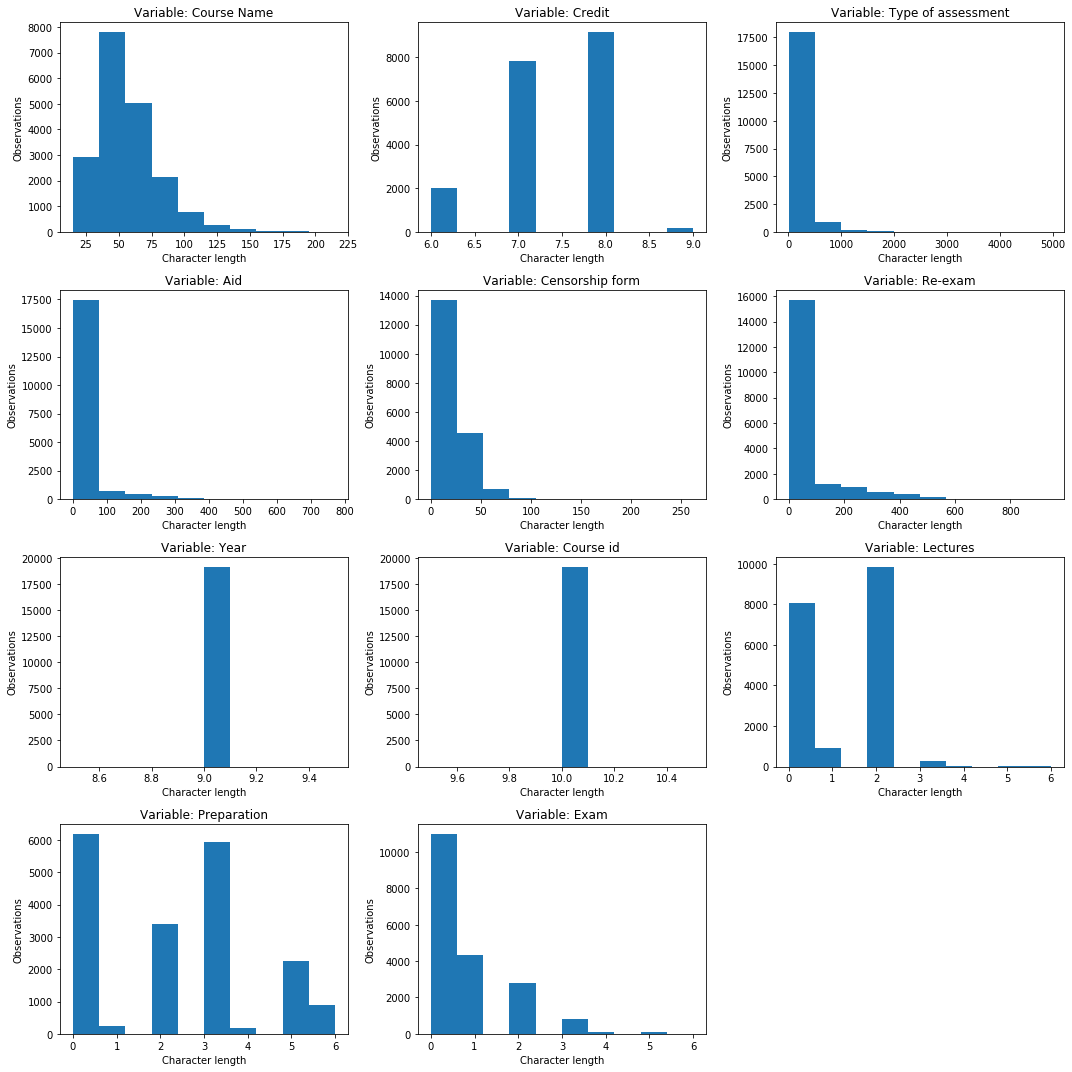

In [23]:
# Plotting the first set of variable in a for in loop. The figure will get too big if we dont split it up. 
f, ax = plt.subplots(figsize=(15,15))

i=1

# Running through each column, ie. scrapped variable.
for col in name_list[0]:
        
        plt.subplot(4, 3, i)
        plt.hist(df[col].fillna('').apply(len))
        plt.ylabel('Observations')
        plt.xlabel('Character length')
        plt.title('Variable: '+ str(col))
        plt.tight_layout()
        i=i+1

f.savefig('histogram_of_course_scrape_FIRST.png')       

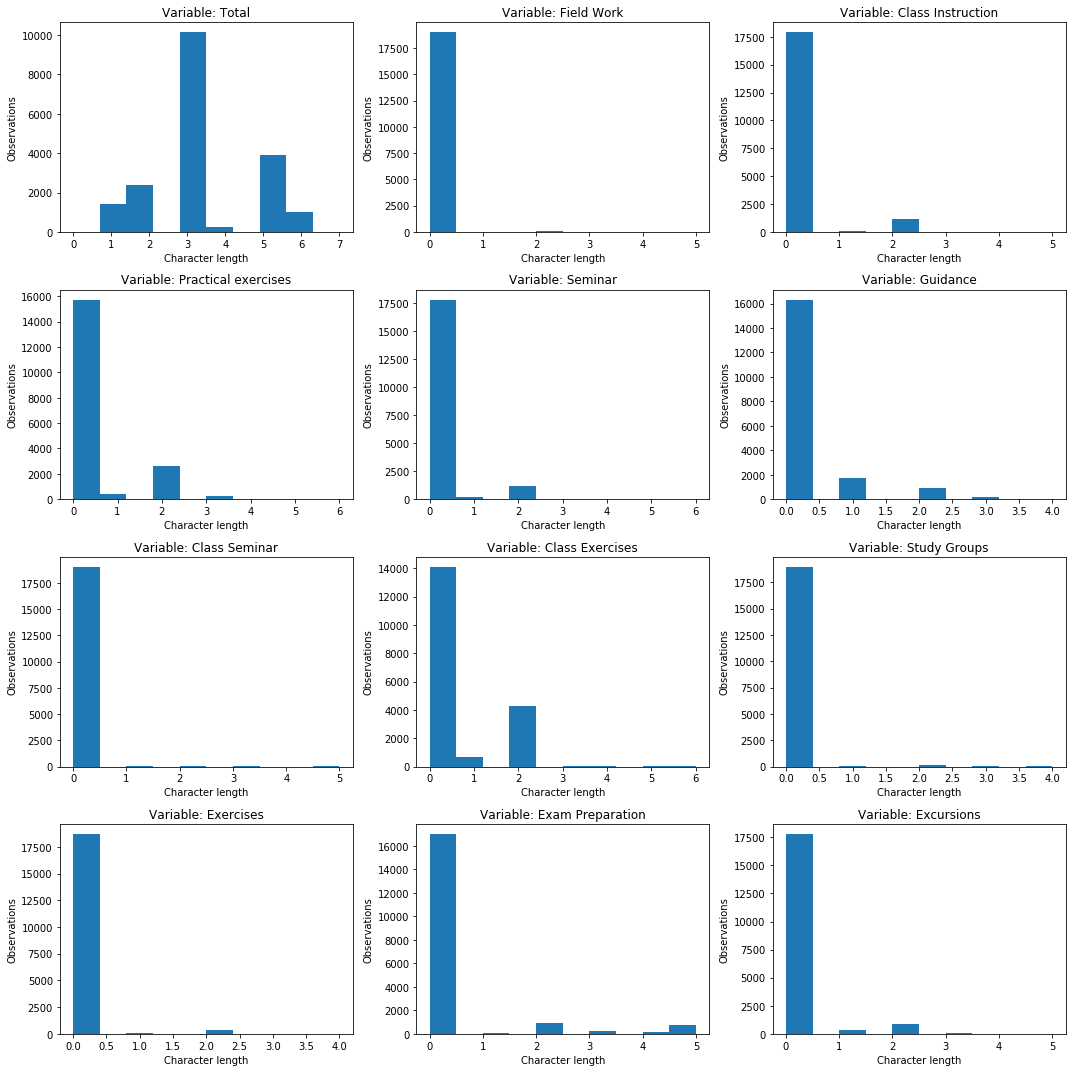

In [24]:
# Second set
f, ax = plt.subplots(figsize=(15,15))

i=1

# Running through each column, ie. scrapped variable.
for col in name_list[1]:
        
        plt.subplot(4, 3, i)
        plt.hist(df[col].fillna('').apply(len))
        plt.ylabel('Observations')
        plt.xlabel('Character length')
        plt.title('Variable: '+ str(col))
        plt.tight_layout()
        i=i+1
        
f.savefig('histogram_of_course_scrape_SECOND.png')  

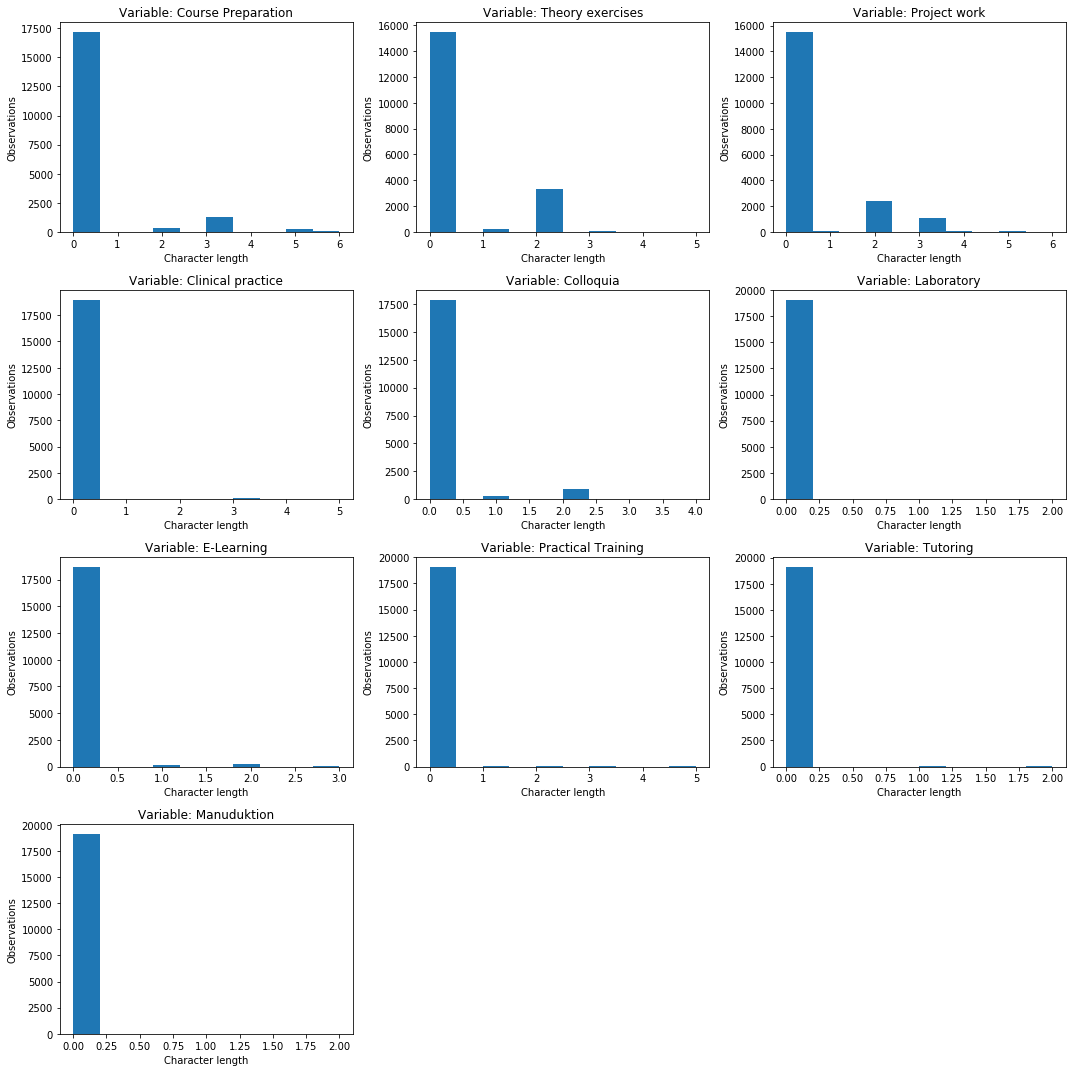

In [25]:
# Third set
f, ax = plt.subplots(figsize=(15,15))
i=1
# Running through each column, ie. scrapped variable.
for col in name_list[2]:
        
        plt.subplot(4, 3, i)
        plt.hist(df[col].fillna('').apply(len))
        plt.ylabel('Observations')
        plt.xlabel('Character length')
        plt.title('Variable: '+ str(col))
        plt.tight_layout()
        i=i+1

f.savefig('histogram_of_course_scrape_THIRD.png')

In [44]:
# Creating new data set, to make on big figre.
chosen_ones = df[['Course Name', 'Credit', 'Type of assessment', 'Aid', \
        'Censorship form', 'Re-exam','Year', 'Course id','Lectures', \
       'Preparation', 'Exam','Total',     'Field Work', \
       'Class Instruction', 'Practical exercises', \
       'Seminar', 'Guidance','Class Seminar','Class Exercises', 'Study Groups', 'Exercises', \
       'Exam Preparation', 'Excursions', 'Course Preparation', 'Theory exercises', 'Project work',\
       'Clinical practice', 'Colloquia', 'Laboratory', \
       'E-Learning', 'Practical Training',  'Tutoring',\
       'Manuduktion']]

In [45]:
#Number of NaN's
df_nans = chosen_ones.apply(lambda x: x.isna().sum())
list_nans=df_nans.tolist() 
list_names=df_nans.index.values.tolist() 

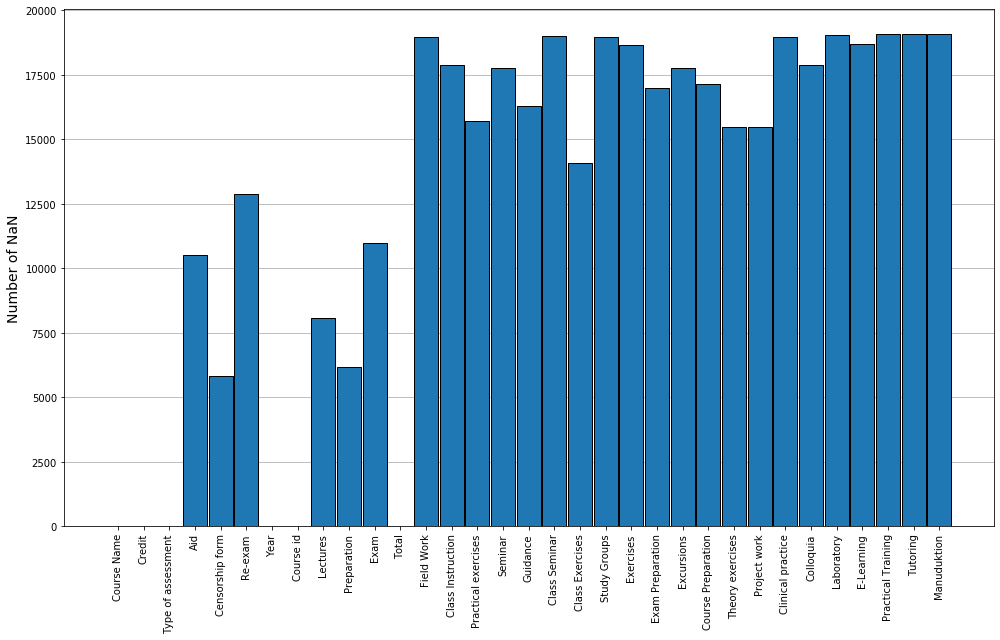

In [48]:
# Creating figure to show number of NaNs for each scrapped variable. 
f, ax = plt.subplots(figsize=(14,9))

plt.subplot(1, 1, 1)
plt.grid(axis ='y',zorder=0)
plt.ylabel('Number of NaN',fontsize=14)
plt.xticks(rotation=90)
plt.bar(list_names, list_nans, width=0.93, edgecolor='black',zorder=3)
plt.tight_layout()

f.savefig('course_number_of_nans.png')

### Analyzing the grade scrape

In [ ]:
# Loading grade scrape data. 
with open('SCRAPE_GRADE_RESULTS.pkl', 'rb') as f:
    grades = pickle.load(f)
    grades = grades.set_index([0])
    grades_trans = grades.Tgrades_trans = grades.T

# Dropping rows which do not contain an URL ie. no exam data exits. 
grades_trans = grades_trans.dropna(subset = ['URL'])

In [172]:
# Replacing with true NaN
grades_trans = grades_trans.replace(to_replace ="nan", value = np.nan) 

In [ ]:
# Converting to string inorder to count strings.
for i in grades_trans.columns.values:
    grades_trans[i] = grades_trans[i].apply(str)

In [187]:
# Replacing with true NaN
grades_trans = grades_trans.replace(to_replace ="nan", value = np.nan) 

In [216]:
#  We split the data in two, since one big figure will be too big.
v1 = ['Kursus', 'Fakultet', 'Institut', 'Termin', 'ECTS','Eksamenstype', 'Antal tilmeldte', 'Fremmødte', 'Antal bestået']
v2 = [ 'Eksamensgennemsnit', 12, 10, 7, 4, 2, 0, -3, 'Ej mødt']

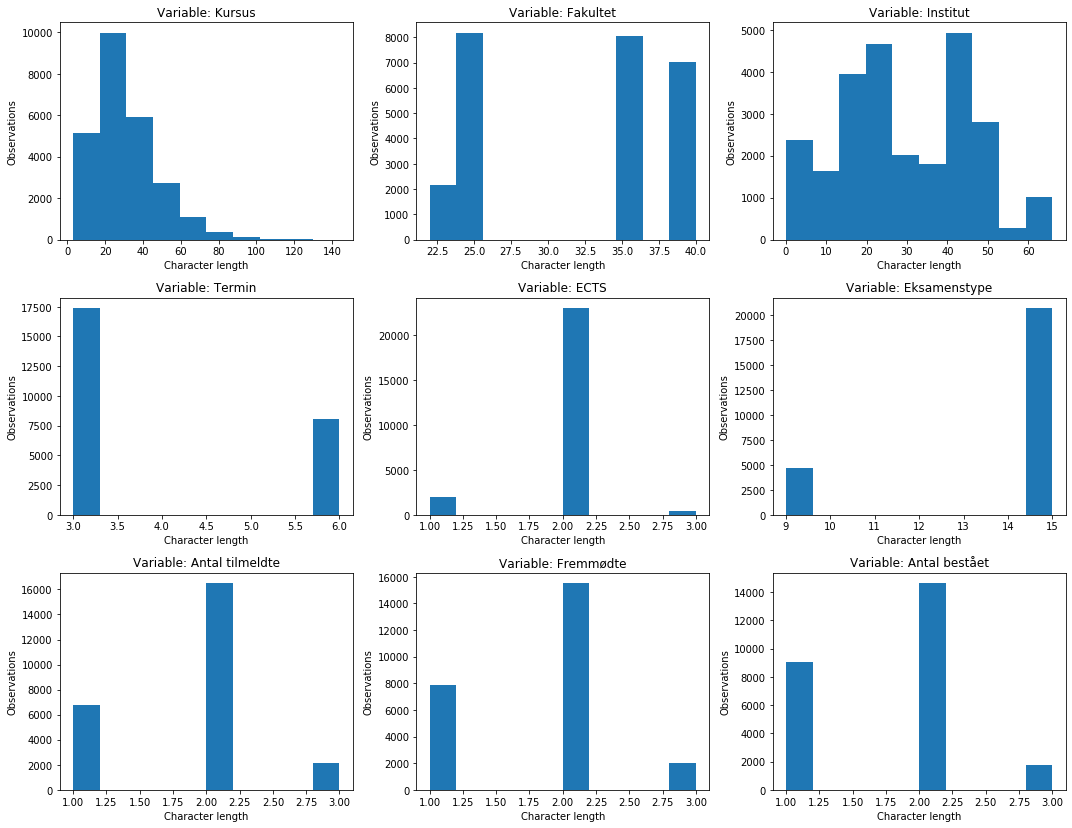

In [217]:
# Plotting the first set of variable in a for in loop.
f, ax = plt.subplots(figsize=(15,15))

# Running through each column, ie. scrapped variable.
for col in v1:
        
        plt.subplot(4, 3, i)
        plt.hist(grades_trans[col].fillna('').apply(len))
        plt.ylabel('Observations')
        plt.xlabel('Character length')
        plt.title('Variable: '+ str(col))
        plt.tight_layout()
        i=i+1

f.savefig('histogram_of_grades_scrape_FIRST.png')     

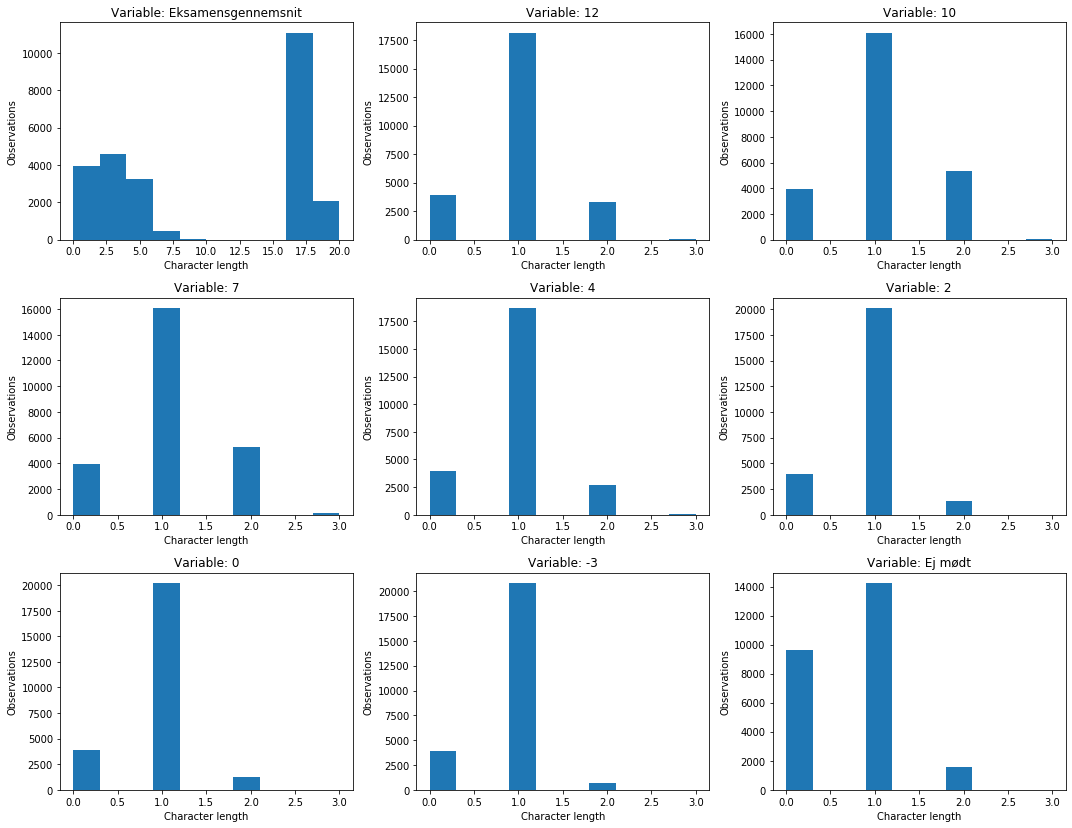

In [218]:
# Plotting the first set of variable in a for in loop.
f, ax = plt.subplots(figsize=(15,15))

i=1
# Running through each column, ie. scrapped variable.
for col in v2:
        
        plt.subplot(4, 3, i)
        plt.hist(grades_trans[col].fillna('').apply(len))
        plt.ylabel('Observations')
        plt.xlabel('Character length')
        plt.title('Variable: '+ str(col))
        plt.tight_layout()
        i=i+1

f.savefig('histogram_of_grades_scrape_SECOND.png')     

In [93]:
high_grades = grades_trans[grades_trans[12]>'100']
high_grades

,URL,Kursus,Fakultet,Institut,Termin,ECTS,Eksamenstype,Antal tilmeldte,Fremmødte,Antal bestået,Eksamensgennemsnit,12,10,7,4,2,0,-3,Ej mødt,Ikke bestået
1,http://karakterstatistik.stads.ku.dk/Histogram...,Numerical methods in atmospheric and oceanic ...,Det Natur- og Biovidenskabelige Fakultet,Niels Bohr Institutet,s15/B3,75,Ordinær eksamen,16,14,14,7.857142857142857,3,2,6,3,0,0,0,2,nan
2,http://karakterstatistik.stads.ku.dk/Histogram...,Toxicology and Drug Safety,Det Sundhedsvidenskabelige Fakultet,Farmaci,v18/B1,5,Ordinær eksamen,163,160,144,5.53125,3,35,44,38,24,13,3,3,nan
9,http://karakterstatistik.stads.ku.dk/Histogram...,\tFeltstudium og projektorienteret forløb,Det Teologiske Fakultet,nan,s15,30,Ordinær eksamen,5,4,4,nan,nan,nan,nan,nan,nan,nan,nan,1,0
14,http://karakterstatistik.stads.ku.dk/Histogram...,"""Os og Dem""- Indvandrings- og integrationspoli...",Det Samfundsvidenskabelige Fakultet,Institut for Statskundskab,s18,75,Ordinær eksamen,17,16,15,8.1875,5,4,4,1,1,0,1,1,nan
15,http://karakterstatistik.stads.ku.dk/Histogram...,"""Os og Dem""- Indvandrings- og integrationspoli...",Det Samfundsvidenskabelige Fakultet,Institut for Statskundskab,v16,75,Ordinær eksamen,29,27,26,8.25925925925926,9,7,4,4,2,0,1,2,nan
16,http://karakterstatistik.stads.ku.dk/Histogram...,"""Os og dem?"" - Indvandrings- og integrationspo...",Det Samfundsvidenskabelige Fakultet,Institut for Statskundskab,v15,75,Ordinær eksamen,23,19,18,7.421052631578948,5,4,3,4,2,1,0,4,nan
17,http://karakterstatistik.stads.ku.dk/Histogram...,"""Os og dem?"" - Indvandrings- og integrationspo...",Det Samfundsvidenskabelige Fakultet,Institut for Statskundskab,v15,10,Ordinær eksamen,7,7,7,6.857142857142857,2,1,0,3,1,0,0,nan,nan
18,http://karakterstatistik.stads.ku.dk/Histogram...,"""Os og dem?"" - Indvandrings- og integrationspo...",Det Samfundsvidenskabelige Fakultet,Institut for Statskundskab,v15,10,Ordinær eksamen,15,15,15,8.533333333333333,4,4,4,3,0,0,0,nan,nan
19,http://karakterstatistik.stads.ku.dk/Histogram...,"""Os og dem?"" - Indvandrings- og integrationspo...",Det Samfundsvidenskabelige Fakultet,Institut for Statskundskab,v14,10,Ordinær eksamen,6,6,6,11.333333333333334,4,2,0,0,0,0,0,nan,nan
20,http://karakterstatistik.stads.ku.dk/Histogram...,"""Os og dem?"" - Indvandrings- og integrationspo...",Det Samfundsvidenskabelige Fakultet,Institut for Statskundskab,v14,10,Ordinær eksamen,23,22,22,10.227272727272727,13,3,5,1,0,0,0,1,nan


In [219]:
# Converting to string first
grades_trans['12']=grades_trans[12]
grades_trans['10']=grades_trans[10]
grades_trans['7']=grades_trans[7]
grades_trans['4']=grades_trans[4]
grades_trans['2']=grades_trans[2]
grades_trans['0']=grades_trans[0]
grades_trans['-3']=grades_trans[-3]

# Then ready
chosen_ones_v2=grades_trans[['Kursus', 'Fakultet', 'Institut', 'Termin', 'ECTS','Eksamenstype', 'Antal tilmeldte', 'Fremmødte', 'Antal bestået',\
                             'Eksamensgennemsnit', '12', '10', '7', '4', '2', '0', '-3', 'Ej mødt']]

In [220]:
#Number of NaN's
df_grades_nans = chosen_ones_v2.apply(lambda x: x.isna().sum())
list_grades_nans=df_grades_nans.tolist() 
list_grades_names=df_grades_nans.index.values.tolist() 

In [221]:
df_grades_nans = str(df_grades_nans)

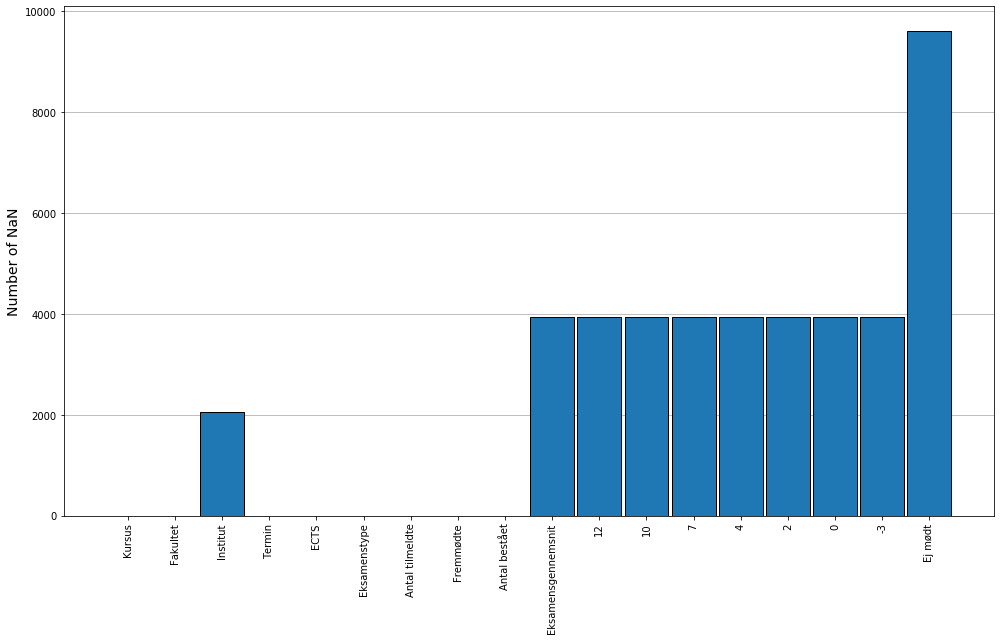

In [222]:
# Creating figure to show number of NaNs for each scrapped variable. 
f, ax = plt.subplots(figsize=(14,9))

plt.subplot(1, 1, 1)
plt.grid(axis ='y',zorder=0)
plt.ylabel('Number of NaN',fontsize=14)
plt.xticks(rotation=90)
plt.bar(list_grades_names, list_grades_nans, width=0.93, edgecolor='black',zorder=3)
plt.tight_layout()

f.savefig('grades_number_of_nans.png')

## Data structuring

In [10]:
import scraping_class
logfile = 'log.txt'## name your log file.
connector = scraping_class.Connector(logfile)
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook

In [11]:
import pandas as pd
import numpy as np
import html5lib
import sys

In [12]:
dict_load = np.load('kurser_scrabe_ALL.npy', allow_pickle=True).item()
dict_load;

In [13]:
df = pd.DataFrame.from_dict(dict_load, orient='index')

### Aid

In [14]:
df['Aid_edit'] = df['Aid']

for i in range(len(df['Aid_edit'])):
    
    if str(df['Aid_edit'][i]) == 'nan':
        df['Aid_edit'][i] = 'nan'
    
    elif df['Aid_edit'][i] == 'Alle hjælpemidler tilladt':
        df['Aid_edit'][i] = 'All aids allowed'
        
    elif df['Aid_edit'][i] == 'Uden hjælpemidler':
        df['Aid_edit'][i] = 'Without aids'
        
    elif df['Aid_edit'][i] == 'Skriftlige hjælpemidler tilladt':
        df['Aid_edit'][i] = 'Written aids allowed'
        
    elif 'Kun visse hjælpemidler tilladt \r' in df['Aid_edit'][i]:
        df['Aid_edit'][i] = 'Only certain aids allowed'
    
    elif 'Only certain aids allowed \r' in df['Aid_edit'][i]:
        df['Aid_edit'][i] = 'Only certain aids allowed'
        
    elif  'Skriftlige hjælpemidler tilladt \r' in df['Aid_edit'][i]:
        df['Aid_edit'][i] = 'Written aids allowed'
        
    elif  'Written aids allowed \r' in df['Aid_edit'][i]:
        df['Aid_edit'][i] = 'Written aids allowed'
        
    elif  'Alle hjælpemidler tilladt \r' in df['Aid_edit'][i]:
        df['Aid_edit'][i] = 'All aids allowed'
        
    elif  'All aids allowed \r' in df['Aid_edit'][i]:
        df['Aid_edit'][i] = 'All aids allowed'   
        
    elif  'Without aids \r' in df['Aid_edit'][i]:
        df['Aid_edit'][i] = 'Without aids'
 
    elif  'Uden hjælpemidler \r' in df['Aid_edit'][i]:
        df['Aid_edit'][i] = 'Without aids'
        
    elif  'No aids are allowed' in df['Aid_edit'][i]:
        df['Aid_edit'][i] = 'Without aids'

    elif  'Ingen hjælpemidler tilladt' in df['Aid_edit'][i]:
        df['Aid_edit'][i] = 'Without aids'
        
    else:
        df['Aid_edit'][i] = 'Only certain aids allowed'

### Marking scale

In [15]:
df['Marking scale_edit'] = df['Marking scale']

for i in range(len(df['Marking scale_edit'])):
    
    if df['Marking scale_edit'][i] == '7-trins skala':
        df['Marking scale_edit'][i] = '7-point grading scale'
        
    elif df['Marking scale_edit'][i] == 'bestået/ikke bestået':
        df['Marking scale_edit'][i] = 'passed/not passed'
        
    elif df['Marking scale_edit'][i] == 'godkendt/ikke godkendt':
        df['Marking scale_edit'][i] = 'completed/not completed'
    
    elif df['Marking scale_edit'][i] == 'Ingen bedømmelse':
        df['Marking scale_edit'][i] = 'Without assessment'
        
    elif str(df['Marking scale_edit'][i]) == 'nan':
        df['Marking scale_edit'][i] = 'nan'

### Censorshp form

In [16]:
df['Censorship form_edit'] = df['Censorship form']

for i in range(len(df['Censorship form_edit'])):
    
    if str(df['Censorship form_edit'][i]) == 'nan':
        df['Censorship form_edit'][i] = 'nan'
    
    elif df['Censorship form_edit'][i] == 'Ingen ekstern censur':
        df['Censorship form_edit'][i] = 'No external censorship'
        
    elif df['Censorship form_edit'][i] == 'Ekstern censur':
        df['Censorship form_edit'][i] = 'External censorship'
        
    elif df['Censorship form_edit'][i][0:14] == 'Ekstern censur':
        df['Censorship form_edit'][i] = 'External censorship'
        
    elif df['Censorship form_edit'][i][0:20] == 'Ingen ekstern censur':
        df['Censorship form_edit'][i] = 'No external censorship'
        
    elif df['Censorship form_edit'][i][0:22] == 'No external censorship':
        df['Censorship form_edit'][i] = 'No external censorship'
            
    elif df['Censorship form_edit'][i][0:19] == 'External censorship':
        df['Censorship form_edit'][i] = 'External censorship'
    
    elif df['Censorship form_edit'][i] == 'ingen censur':
        df['Censorship form_edit'][i] = 'No censorship'
        
    else:
        df['Censorship form_edit'][i] = 'Dependent on exam'

### Level

In [ ]:


df['Bachelor'] = 0
df['Bachelor choice'] = 0
df['Full Degree Master choice'] = 0
df['Full Degree Master'] = 0
df['Propaedeutics'] = 0
df['Part Time Master'] = 0 
df['Ph.D.'] = 0
df['Professionsbachelor'] = 0
df['Master'] = 0



for i in tqdm_notebook(range(0,len(df['Level']))):

    if df['Level'][i].count('Bachelor') == 2:
        df['Bachelor choice'][i] = 1
        df['Bachelor'][i] = 1
        
    elif 'Bachelor tilvalg' in df['Level'][i]:
        df['Bachelor choice'][i] = 1
    
    elif 'Bachelor choice' in  df['Level'][i]:
        df['Bachelor choice'][i] = 1
    
    elif 'Bachelor' in df['Level'][i]:
        df['Bachelor'][i] = 1
            
            
    if df['Level'][i].count('Full Degree Master') == 2:
        df['Full Degree Master choice'][i] = 1
        df['Full Degree Master'][i] = 1    
    elif 'Full Degree Master choice' in  df['Level'][i]:
        df['Full Degree Master choice'][i] = 1        
    elif 'Full Degree Master' in  df['Level'][i]:
        df['Full Degree Master'][i] = 1   
    elif 'Master' in df['Level'][i] and 'Part Time Master' not in df['Level'][i]:
        df['Master'][i] = 1
        
    if df['Level'][i].count('Kandidat') == 2:
        df['Full Degree Master choice'][i] = 1
        df['Full Degree Master'][i] = 1
        
    elif 'Kandidat tilvalg' in  df['Level'][i]:
        df['Full Degree Master choice'][i] = 1
        
    elif 'Kandidat' in  df['Level'][i]:
        df['Full Degree Master'][i] = 1
        
        
    if 'Propaedeutics' in  df['Level'][i]:
        df['Propaedeutics'][i] = 1 
        
    elif 'Propædeutik' in  df['Level'][i]:
        df['Propaedeutics'][i] = 1      
    
    if 'Part Time Master' in df['Level'][i]:
        df['Part Time Master'][i] = 1
        
    if 'Ph.D.' in df['Level'][i]:
        df['Ph.D.'][i] = 1
        
    if  'Ph.d.' in df['Level'][i]:
        df['Ph.D.'][i] = 1
        
    if 'Professionsbachelor' in df['Level'][i]:
        df['Professionsbachelor'][i] = 1

### Duration

In [ ]:
df['Duration_edit'] = df['Duration']

for i in range(len(df['Duration_edit'])):
    if str(df['Duration_edit'][i]) == 'nan':
        df['Duration_edit'][i] = 'nan'
    
    elif df['Duration_edit'][i] == '1 blok':
        df['Duration_edit'][i] = '1 block'
        
    elif df['Duration_edit'][i][0:10] == '1 semester':
        df['Duration_edit'][i] = '1 semester'
        
    elif df['Duration_edit'][i] == '2 blokke':
        df['Duration_edit'][i] = '2 blocks'
        
    elif df['Duration_edit'][i][0:len('1 blok')] == '1 blok':
        df['Duration_edit'][i] = '1 block'
        
    elif df['Duration_edit'][i][0:len('1 block')] == '1 block':
        df['Duration_edit'][i] = '1 block'
    
    if df['Duration_edit'][i] != '1 semester':
        if df['Duration_edit'][i] != '1 block': 
            if df['Duration_edit'][i] != '2 blocks':
                df['Duration_edit'][i] = 'Other/Not specified'

### Editing Credit

In [ ]:
df['Credit_edit'] = df['Credit'].copy()

for i in range(0,len(df['Credit'])):
    
    # Removing ECTS from the credit column and changing , to . 
    df['Credit_edit'][i] = df['Credit'][i][:-5].replace(',','.')
    
# Converting to numeric
df['Credit_edit'] = pd.to_numeric(df['Credit_edit'])

### Editing Workload

In [ ]:
liste = ['Lectures','Preparation','Exam','Total','Practical exercises','Field Work','Guidance','Class Seminar',\
         'Class Exercises','Study Groups','Exercises','Exam Preparation','Excursions','Øvelseshold','Øvelser', \
         'Course Preparation','Theory exercises','Project work','Clinical practice','Praktik','Colloquia', 'Laboratory',\
         'E-Learning','Practical Training','Praksishold','Tutoring','Manuduktion']

for k in liste:
    
    df[k] = df[k].fillna(0).astype(str)
    edit_titel = k + '_edit'
    df[edit_titel] = df[k].copy()

for i in tqdm_notebook(range(0,len(df))):
    
    for k in liste:
        edit_titel = k + '_edit'
        df[edit_titel][i] = df[k][i].replace(',','.')
    
for k in liste:
    edit_titel = k + '_edit'
    df[edit_titel] = pd.to_numeric(df[edit_titel])

### Editing Language

In [ ]:
# Finding unique values in the Language column
print(set(df['Language'].tolist()))

check_danish = ["Dansk","dansk","Danish","danish"]
check_english = ["Engelsk","engelsk","English","english"]

df['Language_edit'] = df['Language'].copy()

for i in tqdm_notebook(range(0,len(df['Language']))):
    
    # Checking for danish
    if any(k in df['Language'][i][:6] for k in check_danish) or any(k in df['Language'][i][:5] for k in check_danish):
        df['Language_edit'][i] = "Danish"
        
    # Checking for enlgish
    elif any(k in df['Language'][i][:7] for k in check_english):
        df['Language_edit'][i] = "English"
        
    else:
        df['Language_edit'][i] = "Other"

### Editing Type of Assesment

In [ ]:
check_written_start = ["Skriftlig","skriftlig","Written","written","skriftlige hjemmeopgave","Skriftlig prøve"] 
check_written_run = ["skriftlige hjemmeopgave","Skriftlig prøve", "skriftlig prøve"] 
check_written_level_2 = ["med opsyn","Med opsyn","under invigilation","Under invigilation", "Peter Bangs Vej"]

check_con_ass = ["Continuous assessment","continuous assessment","Løbende bedømmelse","løbende bedømmelse"]

check_oral = ["Mundtlig","mundtlig","Oral","oral","Fri mundtlig prøve","fri mundtlig prøve"]

check_other = ["Andet","andet","Other","other"]

check_exam = ["Eksamen","eksamen","Exam","exam"]

check_cor_part = ["Kursusdeltagelse","kursusdeltagelse","Course participation","course participation"]
#check_cor_part_written = ["Skriftlig","skriftlig","Written","written","skriftlige hjemmeopgave","Skriftlig prøve"], #\
                         #"KursusdeltagelseSkriftlig","Kursusdeltagelseskriftlig",""]
    
check_port = ["Portfolio","portfolio","Portefølje","portefølje"]

check_prac = ["Praktisk","praktisk","Practical","practical"]

list_written_exams = []
list_written_exams_invigilation = []
list_written_exams_not_invigilation = []


list_oral_exams = []
list_oralandwritten_exams = []

list_con_ass = []
list_con_ass_exams = []

list_other_exams = []

list_cor_part = []
list_cor_part_written = []
list_cor_part_not_written = []

list_port = []

list_prac = []

list_res = []

for i in tqdm_notebook(range(0,len(df_eksamensform))):
    
    # Checking for cont. assement 
    if any(k in df_eksamensform[i][0:21] for k in check_con_ass) or any(k in df_eksamensform[i][0:18] for k in check_con_ass):
        #list_con_ass.append(df_eksamensform[i])
        
        if any(k in df_eksamensform[i] for k in check_exam):
            list_con_ass_exams.append(df_eksamensform[i])
            df['Type of assessmet_edit'][i] = "Continuous assessment exam"
            
        else:
            list_con_ass.append(df_eksamensform[i])
            df['Type of assessmet_edit'][i] = "Continuous assessment not exam"
  
    else:
        # Checking written/skriftligt
        if any(k in df_eksamensform[i][0:9] for k in check_written_start) \
        or any(k in df_eksamensform[i][0:7] for k in check_written_start) \
        or (any(k in df_eksamensform[i] for k in check_written_run) and any(k in df_eksamensform[i][0:5] for k in check_other)):
            #list_written_exams.append(df_eksamensform[i])

            # Under inv. or not.
            if any(k in df_eksamensform[i] for k in check_written_level_2):
                list_written_exams_invigilation.append(df_eksamensform[i])
                df['Type of assessmet_edit'][i] = "Written under invigilation"

            else:
                list_written_exams_not_invigilation.append(df_eksamensform[i])
                df['Type of assessmet_edit'][i] = "Written not under invigilation"

        # Checking mundtligt/oral
        elif any(k in df_eksamensform[i][0:8] for k in check_oral) or any(k in df_eksamensform[i][0:4] for k in check_oral) \
        or (any(k in df_eksamensform[i]for k in check_oral) and any(k in df_eksamensform[i][0:5] for k in check_other)):
            list_oral_exams.append(df_eksamensform[i])
            df['Type of assessmet_edit'][i] = "Oral"

        # Checking andet/other
        elif any(k in df_eksamensform[i][0:5] for k in check_other):
            list_other_exams.append(df_eksamensform[i])
            df['Type of assessmet_edit'][i] = "Other"
        
        # Checking kursusdeltagelse/course participation 
        elif any(k in df_eksamensform[i][0:16] for k in check_cor_part) \
        or any(k in df_eksamensform[i][0:20] for k in check_cor_part) :
            #list_cor_part.append(df_eksamensform[i])
            
            if any(k in df_eksamensform[i] for k in check_written_start):
                list_cor_part_written.append(df_eksamensform[i])
                df['Type of assessmet_edit'][i] = "Course participation written"
                
            else:
                list_cor_part_not_written.append(df_eksamensform[i])
                df['Type of assessmet_edit'][i] = "Course participation not written"
                
        # Checking portfolio
        elif any(k in df_eksamensform[i][0:9] for k in check_port):
            list_port.append(df_eksamensform[i])
            df['Type of assessmet_edit'][i] = "Portfolio"
            
        # Checking practical 
        elif any(k in df_eksamensform[i][0:9] for k in check_prac):
            list_prac.append(df_eksamensform[i])
            df['Type of assessmet_edit'][i] = "Practical"
            
        # Residual 
        else:
            list_res.append(df_eksamensform[i])
            df['Type of assessmet_edit'][i] = "Resdiual"

### Saving data 

In [ ]:
df.to_pickle('kurser_scrabe_ALL_edit.pkl')

### Creating 'ID' to be able to merge on ID and Year

In [ ]:
dfc = pd.read_pickle('kurser_scrabe_ALL_edit.pkl')

In [ ]:
for i in tqdm_notebook(range(len(dfc['Course code']))):
    dfc['ID'][i] = dfc['Course code'][i][:-1]

In [ ]:
dfc = dfc.reset_index()
dfc['URL_C'] = dfc['index']
dfc = dfc.drop('index', axis=1)

In [ ]:
dfc.to_pickle('course_final.pkl')

### Grade data

In [ ]:
with open('grade_scrabe_ALL.pkl', 'rb') as f:
    grades = pickle.load(f)
    grades = grades.set_index([0])
    grades_trans = grades.Tgrades_trans = grades.T

In [ ]:
# Dropping rows which do not contain an URL ie. no exam data exits. 
grades_trans = grades_trans.dropna(subset = ['URL'])


In [ ]:
school_year_list = []

for i in tqdm_notebook(grades_trans.index):
    # Checking for summer exam
    if grades_trans['URL'][i][58:64] == 'Summer':
                        #the exam year minus one year                    the exam year
        school_year = str(int(grades_trans['URL'][i][65:69])-1) + '-' + grades_trans['URL'][i][65:69]
        school_year_list.append(school_year)

    # Checking for winter exam
    elif grades_trans['URL'][i][58:64] == 'Winter':
                        #the exam year minus one year                    the exam year plus one year
        school_year = grades_trans['URL'][i][65:69] + '-' + str(int(grades_trans['URL'][i][65:69])+1)
        school_year_list.append(school_year)
    
grades_trans['Year'] = school_year_list 

In [ ]:
list_id = []
for i in grades_trans.index:
    list_id.append(grades_trans['URL'][i][47:56])
grades_trans['ID'] = list_id

In [ ]:
re_list = []
for i in grades_trans.index:
    if 're' in str(i):
        re_list.append(1)
    else:
        re_list.append(0)
grades_trans['Re-exam_dummy'] = re_list

In [ ]:
#Remnaming and dropping URL so we get both 
grades_trans['URL_E'] = grades_trans['URL']
grades_trans = grades_trans.drop(['URL'], axis=1)

## Merging the two datasets (Grade and Course data)

In [ ]:
df_final = pd.merge(grades_trans, course, on=['ID','Year'], how='inner')

In [ ]:
df_final.to_pickle('df_final_v2.pkl')

In [ ]:
df_final_outer = pd.merge(grades_trans, course, on=['ID','Year'], how='inner')

# Results

## Cencorship, Distribution of year and faculty, Split on level and type of assessment, Faculty and type of assessment

In [2]:
#Import modules
import pandas as pd
import numpy as np
import html5lib
import sys
import pickle
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from matplotlib import pyplot
import math
from math import isnan

In [3]:
with open('df_final-COPY1.pkl', 'rb') as f:
    df = pickle.load(f)

## Data Structuring to graphs and tables

#### Function for couting the categories

In [4]:
def tlen(name):
    tlen = pd.DataFrame()
    tlen_id = []
    tlen_value = []
    tlen_share = []
    for i in df[name].unique():
        tlen_id.append(i)
        tlen_value.append(len(df.loc[df[name] == i]))
        
    for i in df[name].unique():
        tlen_share.append((len(df.loc[df[name] == i])/sum(tlen_value)*100))
        
    tlen_id.append('Total')
    tlen_value.append(sum(tlen_value))
    tlen_share.append(sum(tlen_share))
        
        
    tlen['Id'] = tlen_id
    tlen['Value'] = tlen_value
    tlen['Share %'] = tlen_share
        
    return(tlen.sort_values('Value',ascending=True))

In [5]:
# Counting observation in one year
def tlen_year(name,year):
    df1 = df[df['Year'] == year]
    tlen = pd.DataFrame()
    tlen_id = []
    tlen_value = []
    tlen_share = []
    for i in df[name].unique():
        tlen_id.append(i)
        tlen_value.append(len(df1.loc[df[name] == i]))
    
    for i in df[name].unique():
        tlen_share.append((len(df1.loc[df[name] == i])/sum(tlen_value)*100))
        
    tlen_id.append('Total')
    tlen_value.append(sum(tlen_value))
    tlen_share.append(sum(tlen_share))
        
    tlen['Id'] = tlen_id
    tlen['Value'] = tlen_value
    tlen['Share %'] = tlen_share
        
    return(tlen.sort_values('Value',ascending=True))

In [6]:
# Counting var by year 
def tlen_byyear(name):
    
    tlen = pd.DataFrame()
    tlen_id = []
    tlen_1314 = []
    tlen_1415 = []
    tlen_1516 = []
    tlen_1617 = []
    tlen_1718 = []

    for i in df[name].unique():
        tlen_id.append(i)
        df1 = df[df['Year'] == '2013-2014']
        tlen_1314.append(len(df1.loc[df[name] == i]))
        df2 = df[df['Year'] == '2014-2015']
        tlen_1415.append(len(df2.loc[df[name] == i]))
        df3 = df[df['Year'] == '2015-2016']
        tlen_1516.append(len(df3.loc[df[name] == i]))
        df4 = df[df['Year'] == '2016-2017']
        tlen_1617.append(len(df4.loc[df[name] == i]))
        df5 = df[df['Year'] == '2017-2018']
        tlen_1718.append(len(df5.loc[df[name] == i]))
    
    
        
    tlen_id.append('Total')
    tlen_1314.append(sum(tlen_1314))
    tlen_1415.append(sum(tlen_1415))
    tlen_1516.append(sum(tlen_1516))
    tlen_1617.append(sum(tlen_1617))
    tlen_1718.append(sum(tlen_1718))
    
        
    tlen['Id'] = tlen_id
    tlen['2013-2014'] = tlen_1314
    tlen['2014-2015'] = tlen_1415
    tlen['2015-2016'] = tlen_1516
    tlen['2016-2017'] = tlen_1617
    tlen['2017-2018'] = tlen_1718
        
    return(tlen)

In [7]:
# Share of category by year
def tlen_byyear_share(name):
    
    tlen = pd.DataFrame()
    tlen_id = []
    tlen_1314 = []
    tlen_1415 = []
    tlen_1516 = []
    tlen_1617 = []
    tlen_1718 = []
    tlen_1314s = []
    tlen_1415s = []
    tlen_1516s = []
    tlen_1617s = []
    tlen_1718s = []

    for i in df[name].unique():
        tlen_id.append(i)
        df1 = df[df['Year'] == '2013-2014']
        tlen_1314.append(len(df1.loc[df[name] == i]))
        df2 = df[df['Year'] == '2014-2015']
        tlen_1415.append(len(df2.loc[df[name] == i]))
        df3 = df[df['Year'] == '2015-2016']
        tlen_1516.append(len(df3.loc[df[name] == i]))
        df4 = df[df['Year'] == '2016-2017']
        tlen_1617.append(len(df4.loc[df[name] == i]))
        df5 = df[df['Year'] == '2017-2018']
        tlen_1718.append(len(df5.loc[df[name] == i]))
    
    for i in df[name].unique():
        df1 = df[df['Year'] == '2013-2014']
        tlen_1314s.append(len(df1.loc[df[name] == i])/sum(tlen_1314))
        df2 = df[df['Year'] == '2014-2015']
        tlen_1415s.append(len(df2.loc[df[name] == i])/sum(tlen_1415))
        df3 = df[df['Year'] == '2015-2016']
        tlen_1516s.append(len(df3.loc[df[name] == i])/sum(tlen_1516))
        df4 = df[df['Year'] == '2016-2017']
        tlen_1617s.append(len(df4.loc[df[name] == i])/sum(tlen_1617))
        df5 = df[df['Year'] == '2017-2018']
        tlen_1718s.append(len(df5.loc[df[name] == i])/sum(tlen_1718))
        
    tlen['Id'] = tlen_id
    tlen['2013-2014'] = tlen_1314s
    tlen['2014-2015'] = tlen_1415s
    tlen['2015-2016'] = tlen_1516s
    tlen['2016-2017'] = tlen_1617s
    tlen['2017-2018'] = tlen_1718s
        
    return(tlen)

In [8]:
# Count group by variable
def tlen_bygroup(var, group):
    my_dict = {}
    for i in df[group].unique():
        list_value = []
        list_id = []
        for k in df[var].unique():
            df1 = df[df[group] == i]
            list_value.append(len(df1.loc[df[var] == k]))
            list_id.append(k)
        my_dict[i] = list_value
        
    my_dict['ID'] = list_id
    return(pd.DataFrame.from_dict(my_dict, orient='index').T.set_index('ID'))
        
            

In [ ]:
#Calculate gpa when only passed exams are counted
snit = []
for i in range(0,len(df)):
    x_02 = df[2][i]
    x_04 = df[4][i]
    x_07 = df[7][i]
    x_10 = df[10][i]
    x_12 = df[12][i]
    
    number = (x_12,x_10,x_07,x_04,x_02)
    grades = [12,10,7,4,2]
    mydick = dict(zip(grades,number))
    cleandick = {k: mydick[k] for k in mydick if not isnan(mydick[k])}
    
    num = sum([x * y for x,y in mydick.items()])
    den = sum(mydick.values())
    
    snit.append(num/den)
    
df["Snit"] = snit

In [10]:
# Defining total passed grades 
df['bestået'] = df[2] + df[4] + df[7] + df[10] + df[12]

# Making nan to 0 and creating var for weighted GPA and contribute to weight
l = []
for i in range(len(df['bestået'])):
    if isnan(df['bestået'][i]):
        l.append(0)
    else:
        l.append(df['bestået'][i])

df['bestået'] = l        
df['Snit_w0'] = df['Snit']
l = []
for i in range(len(df['Snit_w0'])):
    if isnan(df['Snit_w0'][i]):
        l.append(0)
    else:
        l.append(df['Snit_w0'][i])
        
df['Snit_w0'] = l
df['W_snit'] = df['Snit_w0']*df['bestået']/sum(df['bestået'])
df['w_bestået'] = df['bestået']*df['Credit_edit']

In [11]:
# Generating Level_all dummies

l = []
for i in range(len(df['Bachelor'])):
    if df['Bachelor'][i] == 1:
        l.append(1)
    elif df['Bachelor choice'][i] == 1:
        l.append(1)
    else:
        l.append(0)

df['Bachelor_all'] = l

l = []
for i in range(len(df['Master'])):
    if df['Master'][i] == 1:
        l.append(1)
    elif df['Full Degree Master choice'][i] == 1:
        l.append(1)
    elif df['Full Degree Master'][i] == 1:
        l.append(1)
    else:
        l.append(0)

df['Master_all'] = l

In [12]:
# creating w_ mean function
def w_mean(categories):
    d = {}
    df_stat1 = pd.DataFrame()
    df_stat1[''] = ['Weighted mean'] 
    for i in categories:
        d[i] = df[df[i] == 1]
        df_stat1[i] = [sum(pd.DataFrame.from_dict(d[i])['W_snit']*sum(df['bestået'])/sum(pd.DataFrame.from_dict(d[i])['bestået']))]
    return(df_stat1)

In [13]:
# Generating Level_only dummies
Master_only = []
Bachelor_only = []
Both = []
Other = []
for i in range(len(df['Bachelor_all'])):
    if df['Bachelor_all'][i] == 1:
        if df['Master_all'][i] == 1:
            Both.append(1)
            Master_only.append(0)
            Bachelor_only.append(0)
            Other.append(0)
        elif df['Master_all'][i] == 0:
            Both.append(0)
            Master_only.append(0)
            Bachelor_only.append(1)
            Other.append(0)
        else:
            print('error', df['Level'][i])
    elif df['Bachelor_all'][i] == 0:
        if df['Master_all'][i] == 1:
            Both.append(0)
            Master_only.append(1)
            Bachelor_only.append(0)
            Other.append(0)
        elif df['Master_all'][i] == 0:
            Both.append(0)
            Master_only.append(0)
            Bachelor_only.append(0)
            Other.append(1)
        else:
            print('error', df['Level'][i])
    else: 
        print('error', df['Level'][i])

df['Master_only'] = Master_only
df['Bachelor_only'] = Bachelor_only
df['Both'] = Both
df['Other'] = Other
 
w_mean(['Master_all', 'Bachelor_all','Master_only','Bachelor_only','Both','Other']);

In [14]:
# We need to weight the grades according to ECTS points. If we do not small courses will have the same weight as
# bigger courses. 
df['Weigthed_m3'] = df['Credit_edit'] * df[-3]
df['Weigthed_00'] = df['Credit_edit'] * df[0]
df['Weigthed_02'] = df['Credit_edit'] * df[2]
df['Weigthed_4'] = df['Credit_edit'] * df[4]
df['Weigthed_7'] = df['Credit_edit'] * df[7]
df['Weigthed_10'] = df['Credit_edit'] * df[10]
df['Weigthed_12'] = df['Credit_edit'] * df[12]
df[['Credit_edit',-3,'Weigthed_m3',0,'Weigthed_00',2,'Weigthed_02',4,'Weigthed_4',7,'Weigthed_7',10,'Weigthed_10',12,'Weigthed_12']];




In [15]:
# Copied from Jens: Weighting the Level categories

y_inner = []
y = []
x = ['02','4','7','10','12']

# Looking at each faculty 
for i in ['Master_only','Bachelor_only','Both','Other']:
    df_level = df[df[i]==1]
   
    for k in ['Weigthed_02','Weigthed_4','Weigthed_7','Weigthed_10','Weigthed_12']:
        y_inner.append(df_level[k].sum(skipna = True)) 
    
    y.append(y_inner)
    y_inner=[]
    
y

# calc frequencies 
y_freq_inner = []
y_freq = []

# running through each faculty
for i in range(len(y)):
    
    # calc frequencies 
    for q in range(len(y[i])):
        y_freq_inner.append(y[i][q]/sum(y[i]))

    y_freq.append(y_freq_inner)
    y_freq_inner = []

#Number of grades given for each faculty. 
list_number_of_grades_faculties = []
for i in ['Master_only','Bachelor_only','Both','Other']:
    df_number_grades = df[df[i] == 1]
    list_number_of_grades_faculties.append(int(sum(df_number_grades[[12, 10, 7, 4, 2]].sum(skipna = True))))

list_number_of_grades_faculties

y_ects_freq = y_freq

In [16]:
#Generating var of Type of assesment with used categories
l = []
for i in range(len(df['Level'])):
    for k in ['Master_only','Bachelor_only','Both','Other']:
        if df[k][i] == 1:
            l.append(k)
df['Level_edit'] = l

l = []
for i in range(len(df['Type of assessmet_edit'])):
        if df['Type of assessmet_edit'][i] == 'Oral':
            l.append('Oral')
        elif df['Type of assessmet_edit'][i] == 'Written not under invigilation':
            l.append('Written not under invigilation')
        elif df['Type of assessmet_edit'][i] == 'Written under invigilation':
            l.append('Written under invigilation')
        else:
            l.append('Rest')
df['toa_edit'] = l
df[['toa_edit','Type of assessmet_edit']];
#tlen_bygroup_weight('toa_edit','Level_edit')

In [17]:
# function with weights 
def tlen_bygroup_weight(var, group):
    my_dict = {}
    for i in df[group].unique():
        list_value = []
        list_id = []
        for k in df[var].unique():
            df1 = df[df[group] == i]
            list_value.append(sum(df1[df[var] == k]['bestået']))
            list_id.append(k)
        my_dict[i] = list_value
        
    my_dict['ID'] = list_id
    return(pd.DataFrame.from_dict(my_dict, orient='index').T.set_index('ID'))

In [18]:
# Function with ECTS weights 
def tlen_bygroup_weight_ects(var, group):
    my_dict = {}
    for i in df[group].unique():
        list_value = []
        list_id = []
        for k in df[var].unique():
            df1 = df[df[group] == i]
            list_value.append(sum(df1[df[var] == k]['w_bestået']))
            list_id.append(k)
        my_dict[i] = list_value
        
    my_dict['ID'] = list_id
    return(pd.DataFrame.from_dict(my_dict, orient='index').T.set_index('ID'))

In [19]:
# Function calculating mean
def w_mean_g(categories, group):
    d = {}
    df_stat1 = pd.DataFrame()
    
    for i in categories:
        l = []
        for k in group:
            df1 = df[df['toa_edit'] == k]
            d[i] = df1[df1[i] == 1]
            l.append(sum(pd.DataFrame.from_dict(d[i])['W_snit']*sum(df['bestået'])/sum(pd.DataFrame.from_dict(d[i])['bestået'])))   
        df_stat1[''] = group
        df_stat1[i] = l
        
        
    return(df_stat1)


w_mean_g(['Bachelor_only','Master_only'], df['toa_edit'].unique()).set_index('');



,Bachelor_only,Master_only
,,
Rest,7.581014,8.756378
Oral,8.369963,9.262555
Written not under invigilation,7.658774,8.370590
Written under invigilation,6.564404,7.184503


#### Output to Report

In [20]:
# Generating table for Censorship

df2 = df[df['Type of assessmet_edit'] == 'Oral' ]
df_nocen = df[df['Censorship form_edit'] == 'No external censorship']
df_cen = df[df['Censorship form_edit'] == 'External censorship']



df_stat1 = pd.DataFrame()
df_stat1[''] = ['Weighted mean'] 
df_stat1['External censorship'] = [sum(df_cen['W_snit']*sum(df['bestået'])/sum(df_cen['bestået']))]
df_stat1['No external censorship'] = [sum(df_nocen['W_snit']*sum(df['bestået'])/sum(df_nocen['bestået']))]
print(df_stat1.set_index('').to_latex())

\begin{tabular}{lrr}
\toprule
{} &  External censorship &  No external censorship \\
              &                      &                         \\
\midrule
Weighted mean &             7.634352 &                7.762438 \\
\bottomrule
\end{tabular}



#### Table. Disribution of year and faculty

In [21]:
print(tlen_byyear('Fakultet').to_latex(index=False))

\begin{tabular}{lrrrrr}
\toprule
                                       Id &  2013-2014 &  2014-2015 &  2015-2016 &  2016-2017 &  2017-2018 \\
\midrule
 Det Natur- og Biovidenskabelige Fakultet &        519 &       1161 &       1205 &       1185 &       1207 \\
      Det Samfundsvidenskabelige Fakultet &        225 &        456 &        534 &        497 &        513 \\
                Det Humanistiske Fakultet &        212 &        421 &        758 &        341 &        244 \\
      Det Sundhedsvidenskabelige Fakultet &        238 &        651 &        637 &        672 &        671 \\
                   Det Juridiske Fakultet &        117 &        269 &        310 &        288 &        280 \\
                  Det Teologiske Fakultet &         35 &         82 &         83 &         86 &         87 \\
                                    Total &       1346 &       3040 &       3527 &       3069 &       3002 \\
\bottomrule
\end{tabular}



#### List of categories we've made

In [22]:
cat_list = ['Aid_edit', 'Marking scale_edit', 'Censorship form_edit', 'Duration_edit', 'Language_edit', 'Type of assessmet_edit']
di = {}
list_1 = []
for i in cat_list:
    list_1 = []
    for k in df[i].unique():
        list_1.append(k)
    di[i]=list_1
print(pd.DataFrame.from_dict(di, orient='index').T.to_latex(index=False))

\begin{tabular}{llllll}
\toprule
                  Aid\_edit &       Marking scale\_edit &    Censorship form\_edit &        Duration\_edit & Language\_edit &            Type of assessmet\_edit \\
\midrule
                       nan &    7-point grading scale &  No external censorship &              1 block &       English &    Continuous assessment not exam \\
          All aids allowed &                      nan &     External censorship &           1 semester &        Danish &                              Oral \\
 Only certain aids allowed &        passed/not passed &                     nan &  Other/Not specified &         Other &    Written not under invigilation \\
      Written aids allowed &  completed/not completed &                    None &             2 blocks &          None &                         Portfolio \\
              Without aids &       Without assessment &                    None &                 None &          None &        Written under invigilation \\
    

#### Graph for cecnsorship 

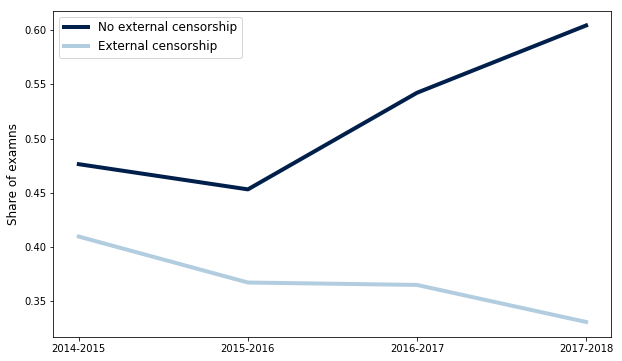

In [23]:
f, axs = plt.subplots(figsize=(10,6))
graph_df = tlen_byyear_share('Censorship form_edit').set_index('Id').T.reset_index()


plt.plot(graph_df['index'][1:],graph_df['No external censorship'][1:],label = 'No external censorship',color = "#011f4b", linewidth=4.0)
plt.plot(graph_df['index'][1:],graph_df['External censorship'][1:],label = 'External censorship',color = "#b3cde0", linewidth=4.0)


plt.legend(loc='best', fontsize = 12)
plt.ylabel('Share of examns',fontsize = 12)
plt.show()
f.savefig('mag3_Censorship_year.png')

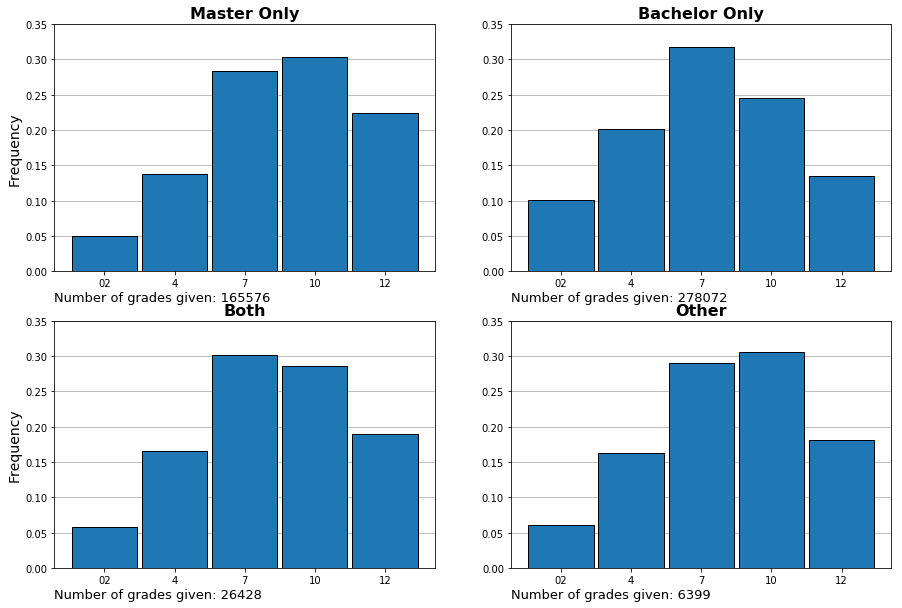

In [24]:
# Historgram of distributions by level
Faculty_names = ['Master Only','Bachelor Only','Both','Other']

f, ax = plt.subplots(figsize=(15,10))

plt.subplot(2, 2, 1)
plt.title(Faculty_names[0], fontsize = 16, weight = 'bold')
plt.ylim([0,0.35])
plt.grid(axis ='y',zorder=0)
plt.ylabel('Frequency',fontsize=14)
plt.annotate('Number of grades given: '+ str(list_number_of_grades_faculties[0]), (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')
plt.bar(x, y_ects_freq[0], width=0.93, edgecolor='black',zorder=3)

plt.subplot(2, 2, 2)
plt.title(Faculty_names[1], fontsize = 16, weight = 'bold')
plt.ylim([0,0.35])
plt.grid(axis ='y',zorder=0)
plt.annotate('Number of grades given: '+ str(list_number_of_grades_faculties[1]), (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')
plt.bar(x, y_ects_freq[1], width=0.93, edgecolor='black',zorder=3)

plt.subplot(2, 2, 3)
plt.title(Faculty_names[2], fontsize = 16, weight = 'bold')
plt.ylim([0,0.35])
plt.grid(axis ='y',zorder=0)
plt.ylabel('Frequency',fontsize=14)
plt.annotate('Number of grades given: '+ str(list_number_of_grades_faculties[2]), (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')
plt.bar(x, y_ects_freq[2], width=0.93, edgecolor='black',zorder=3)

plt.subplot(2, 2, 4)
plt.title(Faculty_names[3], fontsize = 16, weight = 'bold')
plt.ylim([0,0.35])
plt.grid(axis ='y',zorder=0)
plt.annotate('Number of grades given: '+ str(list_number_of_grades_faculties[3]), (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')
plt.bar(x, y_ects_freq[3], width=0.93, edgecolor='black',zorder=3)

f.savefig('histogram_grades_split_Level_ECTS_weight.png')

/Users/MagnusOrberg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/MagnusOrberg/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:181: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. '


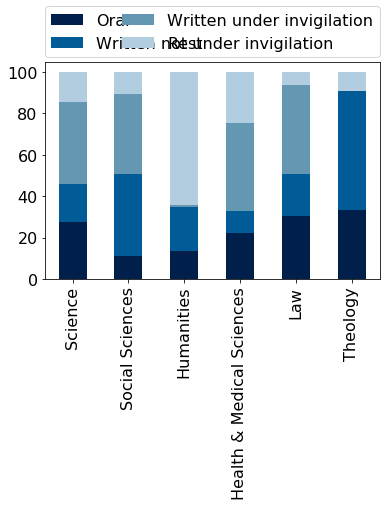

In [25]:
#Diagram of type of assessment
colors = ["#011f4b","#005b96","#6497b1",'#b3cde0']

d = tlen_bygroup_weight('toa_edit','Fakultet')
di = {}
di['ID'] = ['Rest', 'Oral', 'Written not under invigilation', 'Written under invigilation']
for i in d.columns.unique():
    l = []
    for k in range(len(d['Det Natur- og Biovidenskabelige Fakultet'])):
        l.append(d[i][k]/sum(d[i])*100)
    
    di[i] = l
    
dfcat = pd.DataFrame.from_dict(di).set_index('ID') 
dfcat = dfcat.rename(columns ={'Det Natur- og Biovidenskabelige Fakultet':'Science','Det Samfundsvidenskabelige Fakultet':'Social Sciences','Det Humanistiske Fakultet':'Humanities','Det Sundhedsvidenskabelige Fakultet':'Health & Medical Sciences','Det Juridiske Fakultet':'Law','Det Teologiske Fakultet':'Theology'}).T[['Oral', 'Written not under invigilation', 'Written under invigilation','Rest']]
dfcat;

dfcat.plot(kind='bar', stacked=True, color = colors, fontsize = 16)
#plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
plt.rcParams["figure.figsize"] = [10,10]
plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=2, fontsize = 16) #,weight = 'bold')
plt.tight_layout()
plt.savefig('mag_4.png')

/Users/MagnusOrberg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


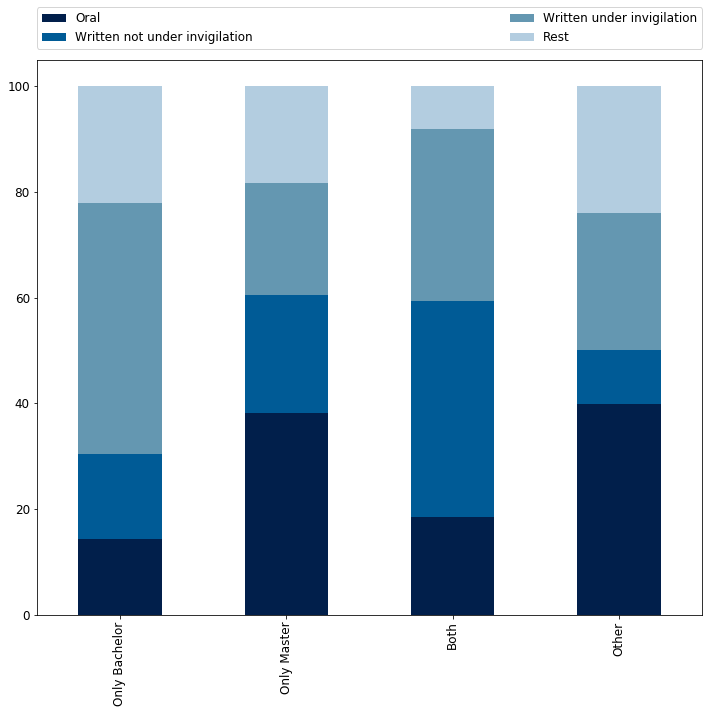

In [26]:
# Diagram of type of assessment
d = tlen_bygroup_weight('toa_edit','Level_edit')
di = {}
di['ID'] = ['Rest', 'Oral', 'Written not under invigilation', 'Written under invigilation']
for i in d.columns.unique():
    l = []
    for k in range(len(d['Master_only'])):
        l.append(d[i][k]/sum(d[i])*100)
    
    di[i] = l
    
dfcat = pd.DataFrame.from_dict(di).set_index('ID') 
dfcat = dfcat.rename(columns ={'Bachelor_only': 'Only Bachelor','Master_only':'Only Master'}).T.reindex(index =['Only Bachelor','Only Master','Both','Other'])[['Oral', 'Written not under invigilation', 'Written under invigilation','Rest']]

colors = ["#011f4b","#005b96","#6497b1",'#b3cde0']


dfcat.plot(kind='bar', stacked=True, color = colors, fontsize = 12)
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
plt.rcParams["figure.figsize"] = [8,8]
plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=2, fontsize = 12) #,weight = 'bold')
plt.tight_layout()
plt.savefig('mag_2stacked_bar_share_ass_level.png')


In [27]:
# Table of GPA by type of assesment and Level
print(w_mean_g(['Bachelor_only','Master_only','Both','Other'], df['toa_edit'].unique()).set_index('').to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  Bachelor\_only &  Master\_only &      Both &     Other \\
                               &                &              &           &           \\
\midrule
Rest                           &       7.581014 &     8.756378 &  8.619758 &  8.430719 \\
Oral                           &       8.369963 &     9.262555 &  8.650164 &  8.361100 \\
Written not under invigilation &       7.658774 &     8.370590 &  8.240386 &  7.975831 \\
Written under invigilation     &       6.564404 &     7.184503 &  6.930722 &  6.714200 \\
\bottomrule
\end{tabular}



## Year and season

In [31]:
#Import modules
import scraping_class
logfile = 'log.txt' 
connector = scraping_class.Connector(logfile)
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from urllib.parse import unquote, quote
import pandas as pd
import numpy as np
import html5lib
import sys
import pickle
from tqdm import tqdm_notebook
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [32]:
with open('df_final_JacobLeg.pkl', 'rb') as f:
    df = pickle.load(f)

In [33]:
df.columns.values

array(['Kursus', 'Fakultet', 'Institut', 'Termin', 'ECTS', 'Eksamenstype',
       'Antal tilmeldte', 'Fremmødte', 'Antal bestået',
       'Eksamensgennemsnit', 12, 10, 7, 4, 2, 0, -3, 'Ej mødt',
       'Ikke bestået', 'Year', 'ID', 'Re-exam_dummy', 'URL_E', 'level_0',
       'Course Name', 'Credit', 'Type of assessment', 'Aid',
       'Marking scale', 'Censorship form', 'Exam period', 'Re-exam',
       'Language', 'Course code', 'Level', 'Duration', 'Placement',
       'Schedule', 'Study board', 'Course id', 'Category', 'Lectures',
       'Preparation', 'Exam', 'Total', 'Content', 'Learning\r\nOutcome',
       'Class Instruction', 'Practical exercises',
       'Exam registration requirements', 'Field Work', 'Course capacity',
       'Seminar', 'Guidance', 'Continuing and further education', 'Price',
       'Class Seminar', 'Class Exercises', 'Study Groups', 'Exercises',
       'Exam Preparation', 'Excursions', 'Øvelseshold', 'Øvelser',
       'Course Preparation', 'Theory exercises', '

In [34]:
y_inner = []
y = []
x = ['-3','00','02','4','7','10','12']

# Looking at each Year 
for i in df['Year'].unique():
    df_Year = df[df['Year']==i]
   
    for k in [-3,0,2,4,7,10,12]:
        y_inner.append(df_Year[k].sum(skipna = True))  #<= Do we have a list in a list
    
    y.append(y_inner)
    y_inner=[]

    
# calc frequencies 
y_freq_inner = []
y_freq = []

# running through each year
for i in range(len(y)):
    
    # calc frequencies 
    for q in range(len(y[i])):
        y_freq_inner.append(y[i][q]/sum(y[i]))

    y_freq.append(y_freq_inner)
    y_freq_inner = []

y_freq;

#Create sum of all grades list 
y_sum_grades = []
grades = [-3, 00, 2, 4, 7, 10, 12]

for i in range(len(grades)):
    y_sum_grades.append(df[grades[i]].sum())

#Create freq for sum of all grades    
y_sum_grades_sum = sum(y_sum_grades)
y_sum_grades_freq = []

for i in range(len(y_sum_grades)):
    y_sum_grades_freq.append(y_sum_grades[i]/y_sum_grades_sum)

y_sum_grades_freq;

## Unweighted Tables

<BarContainer object of 7 artists>

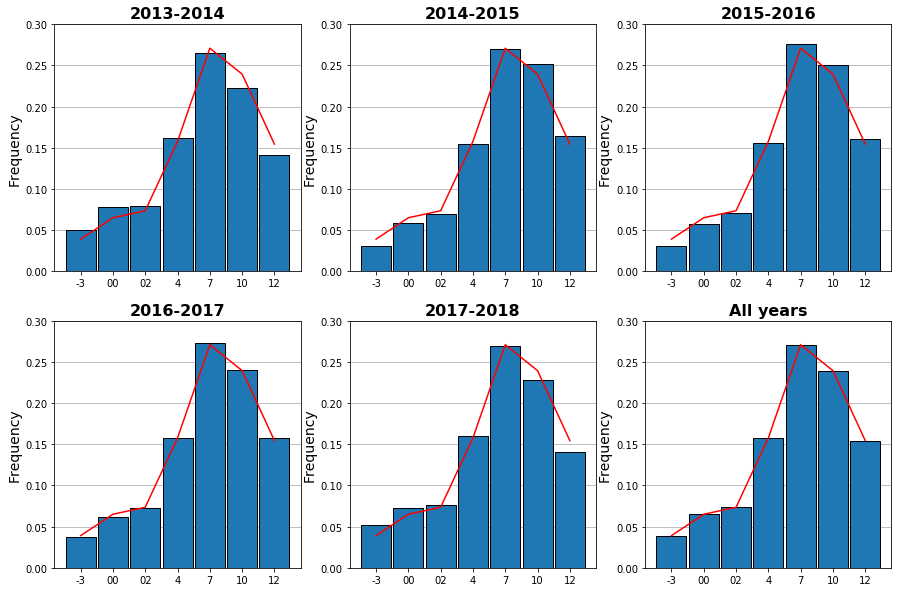

In [35]:
years = ["2013-2014","2014-2015","2015-2016","2016-2017","2017-2018"]

f, ax = plt.subplots(figsize=(15,10))

#Loop and create each individual figure
for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.title(years[i], fontsize = 16, weight = 'bold')
    plt.ylim([0,0.30])
    plt.grid(axis ='y',zorder=0)
    plt.ylabel('Frequency',fontsize=14)
    plt.plot(x, y_sum_grades_freq, color='red', zorder=4)
    plt.bar(x, y_freq[i], width=0.93, edgecolor='black',zorder=3)

plt.subplot(2, 3, 6)
plt.title("All years", fontsize = 16, weight = 'bold')
plt.ylim([0,0.30])
plt.grid(axis ='y',zorder=0)
plt.ylabel('Frequency',fontsize=14)
plt.plot(x, y_sum_grades_freq, color='red', zorder=4)
plt.bar(x, y_sum_grades_freq, width=0.93, edgecolor='black',zorder=3)

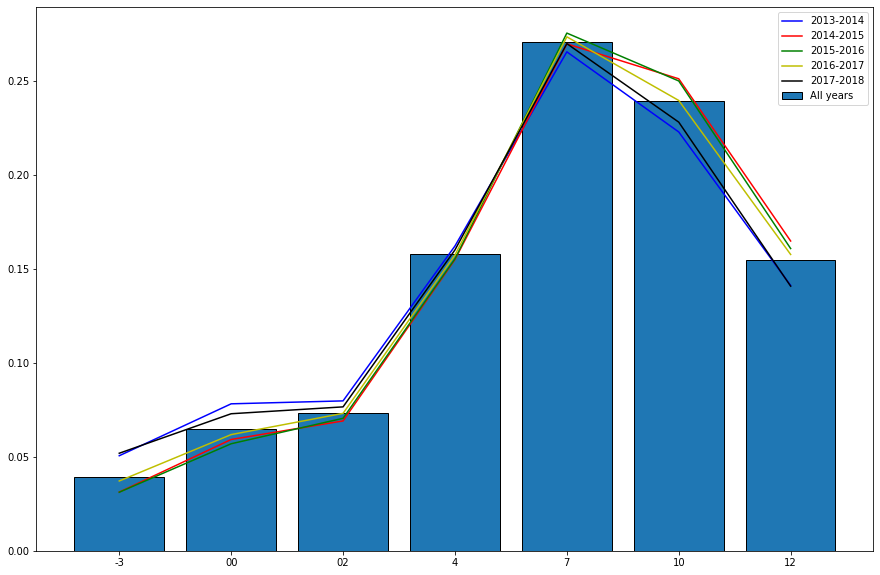

In [36]:
#Create overall figure
f, axs = plt.subplots(figsize=(15,10))

plt.plot(x, y_freq[0],'b-', label = years[0])
plt.plot(x, y_freq[1],'r-',label = years[1])
plt.plot(x, y_freq[2],'g-',label = years[2])
plt.plot(x, y_freq[3], 'y-',label = years[3])
plt.plot(x, y_freq[4],'k-',label = years[4])
plt.bar(x, y_sum_grades_freq,edgecolor="black", label = "All years")
plt.legend(loc='best')
plt.show()

## ECTS weights

In [37]:
#Create ECTS weighed variables 
df['Weigthed_m3'] = df['Credit_edit'] * df[-3]
df['Weigthed_00'] = df['Credit_edit'] * df[0]
df['Weigthed_02'] = df['Credit_edit'] * df[2]
df['Weigthed_4'] = df['Credit_edit'] * df[4]
df['Weigthed_7'] = df['Credit_edit'] * df[7]
df['Weigthed_10'] = df['Credit_edit'] * df[10]
df['Weigthed_12'] = df['Credit_edit'] * df[12]

In [70]:
#Do same calculations as above, but with weights insted 
y_inner_w = []
y_w = []
x = ['-3','00','02','4','7','10','12']

# Looking at each Year 
for i in df['Year'].unique():
    df_Year = df[df['Year']==i]
   
    for k in ['Weigthed_m3','Weigthed_00','Weigthed_02','Weigthed_4','Weigthed_7','Weigthed_10','Weigthed_12']:
        y_inner_w.append(df_Year[k].sum(skipna = True))  #<= Do we have a list in a list
    
    y_w.append(y_inner_w)
    y_inner_w=[]


# calc frequencies 
y_freq_inner_w = []
y_freq_w = []

# running through each year
for i in range(len(y_w)):
    
    # calc frequencies 
    for q in range(len(y_w[i])):
        y_freq_inner_w.append(y_w[i][q]/sum(y_w[i]))

    y_freq_w.append(y_freq_inner_w)
    y_freq_inner_w = []

y_freq_w;

#Create sum of all grades list 
y_sum_grades_w = []
grades = ['Weigthed_m3','Weigthed_00','Weigthed_02','Weigthed_4','Weigthed_7','Weigthed_10','Weigthed_12']

for i in range(len(grades)):
    y_sum_grades_w.append(df[grades[i]].sum())

#Create freq for sum of all grades    
y_sum_grades_sum_w = sum(y_sum_grades_w)
y_sum_grades_freq_w = []

for i in range(len(y_sum_grades_w)):
    y_sum_grades_freq_w.append(y_sum_grades_w[i]/y_sum_grades_sum_w)

y_sum_grades_freq_w;

## Make same graphs but with weights

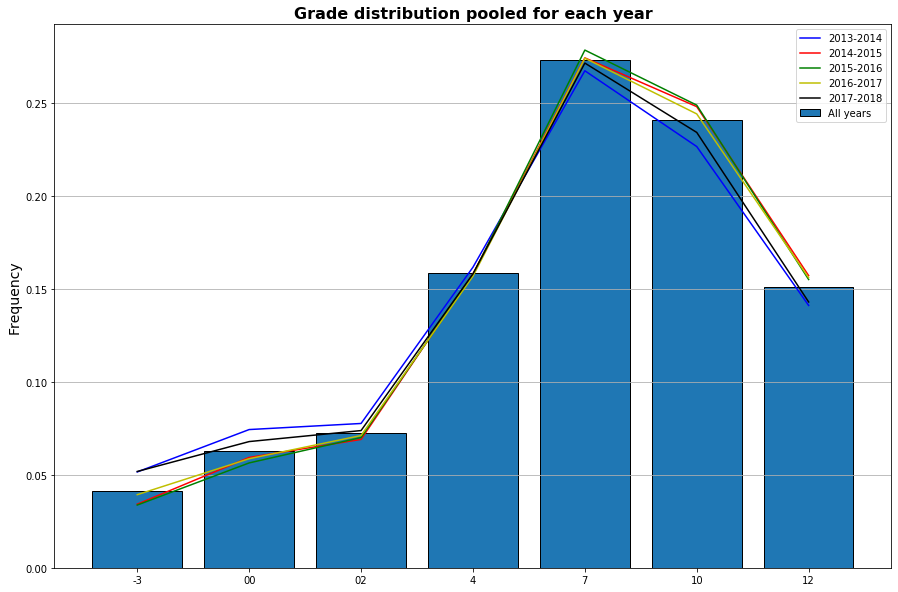

In [46]:
f, axs = plt.subplots(figsize=(15,10))

plt.grid(axis ='y')
plt.plot(x, y_freq_w[0],'b-', label = years[0])
plt.plot(x, y_freq_w[1],'r-',label = years[1])
plt.plot(x, y_freq_w[2],'g-',label = years[2])
plt.plot(x, y_freq_w[3], 'y-',label = years[3])
plt.plot(x, y_freq_w[4],'k-',label = years[4])
plt.bar(x, y_sum_grades_freq_w,edgecolor="black", label = "All years")
plt.ylabel('Frequency',fontsize=14)
plt.legend(loc='best')
plt.title("Grade distribution pooled for each year", fontsize = 16, weight = 'bold')
plt.show()

In [40]:
Termin_edit = []
for i in range (len(df["Termin"])):
    if df["Termin"][i].__contains__("s") == True:
        Termin_edit.append(1)
    else:
        Termin_edit.append(0)

In [56]:
df["Termin_edit"] = Termin_edit

In [42]:
#Do same calculations as above, but with weights insted 
y_inner_e = []
y_e = []
x = ['-3','00','02','4','7','10','12']

# Looking at each Year 
for i in df['Termin_edit'].unique():
    df_Termin_edit = df[df['Termin_edit']==i]
   
    for k in ['Weigthed_m3','Weigthed_00','Weigthed_02','Weigthed_4','Weigthed_7','Weigthed_10','Weigthed_12']:
        y_inner_e.append(df_Termin_edit[k].sum(skipna = True))  #<= Do we have a list in a list
    
    y_e.append(y_inner_e)
    y_inner_e=[]
    
# calc frequencies 
y_freq_inner_e = []
y_freq_e = []

# running through each year
for i in range(len(y_e)):
    
    # calc frequencies 
    for q in range(len(y_e[i])):
        y_freq_inner_e.append(y_e[i][q]/sum(y_e[i]))

    y_freq_e.append(y_freq_inner_e)
    y_freq_inner_e = []

y_freq_e;

#Create sum of all grades list 
y_sum_grades_e = []
grades = ['Weigthed_m3','Weigthed_00','Weigthed_02','Weigthed_4','Weigthed_7','Weigthed_10','Weigthed_12']

for i in range(len(grades)):
    y_sum_grades_e.append(df[grades[i]].sum())

#Create freq for sum of all grades    
y_sum_grades_sum_e = sum(y_sum_grades_e)
y_sum_grades_freq_e = []

for i in range(len(y_sum_grades_e)):
    y_sum_grades_freq_e.append(y_sum_grades_e[i]/y_sum_grades_sum_e)

y_sum_grades_freq_e;

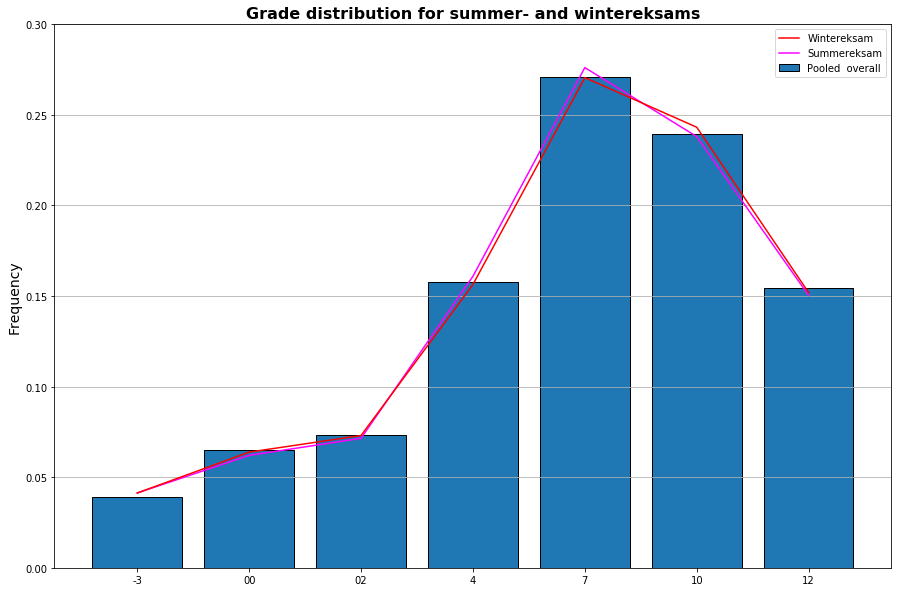

In [45]:

f, ax = plt.subplots(figsize=(15,10))

plt.title("Grade distribution for summer- and wintereksams", fontsize = 16, weight = 'bold')
plt.ylim([0,0.30])
plt.grid(axis ='y',zorder=0)
plt.ylabel('Frequency',fontsize=14)
plt.bar(x, y_sum_grades_freq, edgecolor='black', zorder=1, label ="Pooled  overall")
plt.plot(x, y_freq_e[0],zorder=3, label="Wintereksam", color="red")
plt.plot(x, y_freq_e[1],zorder=2, label="Summereksam", color="magenta")
plt.legend(loc='best')

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 ]),
 <a list of 7 Text yticklabel objects>)

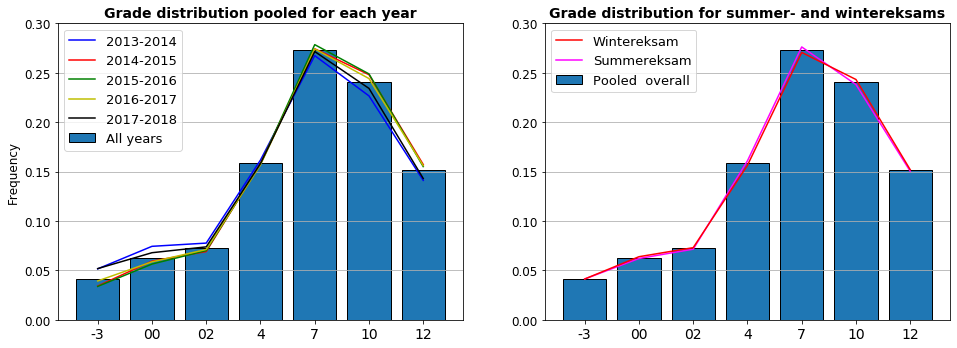

In [95]:
f, ax = plt.subplots(figsize=(16,12))

plt.subplot(2, 2, 1)
plt.grid(axis ='y')
plt.plot(x, y_freq_w[0],'b-', label = years[0])
plt.plot(x, y_freq_w[1],'r-',label = years[1])
plt.plot(x, y_freq_w[2],'g-',label = years[2])
plt.plot(x, y_freq_w[3], 'y-',label = years[3])
plt.plot(x, y_freq_w[4],'k-',label = years[4])
plt.bar(x, y_sum_grades_freq_w,edgecolor="black", label = "Pooled")
plt.ylabel('Frequency',fontsize=12)
plt.ylim([0,0.30])
plt.title("Grade distribution pooled for each year", fontsize = 14, weight = 'bold')
plt.legend(loc='best', fontsize = 13)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)

plt.subplot(2, 2, 2)
plt.ylim([0,0.30])
plt.grid(axis ='y',zorder=0)
plt.bar(x, y_sum_grades_freq_e, edgecolor='black', zorder=1, label ="Pooled")
plt.plot(x, y_freq_e[0],zorder=3, label="Wintereksam", color="red")
plt.plot(x, y_freq_e[1],zorder=2, label="Summereksam", color="magenta")
plt.title("Grade distribution for summer- and wintereksams", fontsize = 14, weight = 'bold')
plt.legend(loc='best', fontsize = 13)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)

## Faculties, weighing, and ECTS calculation

In [ ]:
import scraping_class
logfile = 'log.txt'## name your log file.
connector = scraping_class.Connector(logfile)
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook

In [ ]:
import pandas as pd
import numpy as np
import html5lib
import sys
import pickle
from tqdm import tqdm_notebook
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [ ]:
with open('df_final.pkl', 'rb') as f:
    df = pickle.load(f)

### Grade distrubtion by Faculties (used in the appendix)

In [ ]:
# note: no NaN's
print(df['Fakultet'].unique())

In [ ]:
# Number of courses by faculty
print(sum(df['Fakultet'] == 'Det Natur- og Biovidenskabelige Fakultet'))
print(sum(df['Fakultet'] == 'Det Samfundsvidenskabelige Fakultet'))
print(sum(df['Fakultet'] == 'Det Humanistiske Fakultet'))
print(sum(df['Fakultet'] == 'Det Sundhedsvidenskabelige Fakultet'))
print(sum(df['Fakultet'] == 'Det Juridiske Fakultet'))
print(sum(df['Fakultet'] == 'Det Teologiske Fakultet'))

In [ ]:
#Number of grades given for each faculty. 
list_number_of_grades_faculties = []
for i in tqdm_notebook(df['Fakultet'].unique()):
    df_number_grades = df[df['Fakultet'] == i]
    list_number_of_grades_faculties.append(int(sum(df_number_grades[[12, 10, 7, 4, 2, 0, -3]].sum(skipna = True))))

list_number_of_grades_faculties;

In [ ]:
#Number of passing grades given for each faculty. 
list_no_fail_number_of_grades_faculties = []
for i in tqdm_notebook(df['Fakultet'].unique()):
    df_number_grades = df[df['Fakultet'] == i]
    list_no_fail_number_of_grades_faculties.append(int(sum(df_number_grades[[12, 10, 7, 4, 2]].sum(skipna = True))))

list_no_fail_number_of_grades_faculties

### Grade distrubtion by Faculties,  weighted against ECTS

In [ ]:
# We need to weight the grades according to ECTS points. If we do not small courses will have the same weight as
# bigger courses. 
df['Weigthed_m3'] = df['Credit_edit'] * df[-3]
df['Weigthed_00'] = df['Credit_edit'] * df[0]
df['Weigthed_02'] = df['Credit_edit'] * df[2]
df['Weigthed_4'] = df['Credit_edit'] * df[4]
df['Weigthed_7'] = df['Credit_edit'] * df[7]
df['Weigthed_10'] = df['Credit_edit'] * df[10]
df['Weigthed_12'] = df['Credit_edit'] * df[12]
df[['Credit_edit',-3,'Weigthed_m3',0,'Weigthed_00',2,'Weigthed_02',4,'Weigthed_4',7,'Weigthed_7',10,'Weigthed_10',12,'Weigthed_12']];

In [ ]:
y_ects_inner = []
y_ects = []
x = ['-3','00','02','4','7','10','12']

# Looking at each faculty 
for i in tqdm_notebook(df['Fakultet'].unique()):
    df_faculty = df[df['Fakultet']==i]
   
    # Using the weighted grades this time.
    for k in ['Weigthed_m3','Weigthed_00','Weigthed_02','Weigthed_4','Weigthed_7','Weigthed_10','Weigthed_12']:
        y_ects_inner.append(df_faculty[k].sum(skipna = True)) 
    
    y_ects.append(y_ects_inner)
    y_ects_inner=[]

In [ ]:
# calc frequencies 
y_ects_freq_inner = []
y_ects_freq = []

# running through each faculty
for i in range(len(y_ects)):
    
    # calc frequencies 
    for q in range(len(y_ects[i])):
        y_ects_freq_inner.append(y_ects[i][q]/sum(y_ects[i]))

    y_ects_freq.append(y_ects_freq_inner)
    y_ects_freq_inner = []

In [ ]:
# This figure is used in the analysis. It uses WEIGHTED grades
f, ax = plt.subplots(figsize=(15,10))

plt.subplot(2, 3, 1)
plt.title(Faculty_names[0], fontsize = 16, weight = 'bold')
plt.ylim([0,0.30])
plt.grid(axis ='y',zorder=0)
plt.ylabel('Frequency',fontsize=14)
plt.annotate('Number of grades th=0.93, edgecolor='black',zorder=3)
given: '+ str(list_number_of_grades_faculties[0]), (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')
plt.bar(x, y_ects_freq[0], wid
plt.subplot(2, 3, 2)
plt.title(Faculty_names[1], fontsize = 16, weight = 'bold')
plt.ylim([0,0.30])
plt.grid(axis ='y',zorder=0)
plt.annotate('Number of grades given: '+ str(list_number_of_grades_faculties[1]), (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')
plt.bar(x, y_ects_freq[1], width=0.93, edgecolor='black',zorder=3)

plt.subplot(2, 3, 3)
plt.title(Faculty_names[2], fontsize = 16, weight = 'bold')
plt.ylim([0,0.30])
plt.grid(axis ='y',zorder=0)
plt.annotate('Number of grades given: '+ str(list_number_of_grades_faculties[2]), (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')
plt.bar(x, y_ects_freq[2], width=0.93, edgecolor='black',zorder=3)

plt.subplot(2, 3, 4)
plt.title(Faculty_names[3], fontsize = 16, weight = 'bold')
plt.ylim([0,0.30])
plt.grid(axis ='y',zorder=0)
plt.ylabel('Frequency',fontsize=14)
plt.annotate('Number of grades given: '+ str(list_number_of_grades_faculties[3]), (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')
plt.bar(x, y_ects_freq[3], width=0.93, edgecolor='black',zorder=3)

plt.subplot(2, 3, 5)
plt.title(Faculty_names[4], fontsize = 16, weight = 'bold')
plt.ylim([0,0.30])
plt.grid(axis ='y',zorder=0)
plt.annotate('Number of grades given: '+ str(list_number_of_grades_faculties[4]), (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')
plt.bar(x, y_ects_freq[4], width=0.93, edgecolor='black',zorder=3)

plt.subplot(2, 3, 6)
plt.title(Faculty_names[5], fontsize = 16, weight = 'bold')
plt.ylim([0,0.30])
plt.grid(axis ='y',zorder=0)
plt.annotate('Number of grades given: '+ str(list_number_of_grades_faculties[5]), (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')
plt.bar(x, y_ects_freq[5], width=0.93, edgecolor='black',zorder=3)

f.savefig('histogram_gades_split_faculty_ECTS_weight.png')

### Faculties,  weighted against ECTS - droppping -3 and 00

In [ ]:
y_no_fail_ects = []
x_no_fail = ['02','4','7','10','12']

# Looking at each faculty 
for i in tqdm_notebook(df['Fakultet'].unique()):
    df_faculty = df[df['Fakultet']==i]
    
    y_no_fail_ects_inner=[]
   
    for k in ['Weigthed_02','Weigthed_4','Weigthed_7','Weigthed_10','Weigthed_12']:
        y_no_fail_ects_inner.append(df_faculty[k].sum(skipna = True)) 
    
    y_no_fail_ects.append(y_no_fail_ects_inner)
    
y_no_fail_ects

In [ ]:
# calc frequencies 
y_no_fail_ects_freq = []

# running through each faculty
for i in range(len(y_ects)):
    
    y_no_fail_ects_freq_inner = []
    
    # calc frequencies 
    for q in range(len(y_no_fail_ects[i])):
        y_no_fail_ects_freq_inner.append(y_no_fail_ects[i][q]/sum(y_no_fail_ects[i]))

    y_no_fail_ects_freq.append(y_no_fail_ects_freq_inner)


y_no_fail_ects_freq

In [ ]:
# This figure is used in the analysis
f, ax = plt.subplots(figsize=(15,10))

plt.subplot(2, 3, 1)
plt.title(Faculty_names[0], fontsize = 16, weight = 'bold')
plt.ylim([0,0.35])
plt.grid(axis ='y',zorder=0)
plt.ylabel('Frequency',fontsize=14)
plt.annotate('Number of passing grades: '+ str(list_no_fail_number_of_grades_faculties[0]), (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')
plt.bar(x_no_fail, y_no_fail_ects_freq[0], width=0.93, edgecolor='black',zorder=3)

plt.subplot(2, 3, 2)
plt.title(Faculty_names[1], fontsize = 16, weight = 'bold')
plt.ylim([0,0.35])
plt.grid(axis ='y',zorder=0)
plt.annotate('Number of passing grades: '+ str(list_no_fail_number_of_grades_faculties[1]), (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')
plt.bar(x_no_fail, y_no_fail_ects_freq[1], width=0.93, edgecolor='black',zorder=3)

plt.subplot(2, 3, 3)
plt.title(Faculty_names[2], fontsize = 16, weight = 'bold')
plt.ylim([0,0.35])
plt.grid(axis ='y',zorder=0)
plt.annotate('Number of passing grades: '+ str(list_no_fail_number_of_grades_faculties[2]), (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')
plt.bar(x_no_fail, y_no_fail_ects_freq[2], width=0.93, edgecolor='black',zorder=3)

plt.subplot(2, 3, 4)
plt.title(Faculty_names[3], fontsize = 16, weight = 'bold')
plt.ylim([0,0.35])
plt.grid(axis ='y',zorder=0)
plt.ylabel('Frequency',fontsize=14)
plt.annotate('Number of passing grades: '+ str(list_no_fail_number_of_grades_faculties[3]), (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')
plt.bar(x_no_fail, y_no_fail_ects_freq[3], width=0.93, edgecolor='black',zorder=3)

plt.subplot(2, 3, 5)
plt.title(Faculty_names[4], fontsize = 16, weight = 'bold')
plt.ylim([0,0.35])
plt.grid(axis ='y',zorder=0)
plt.annotate('Number of passing grades: '+ str(list_no_fail_number_of_grades_faculties[4]), (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')
plt.bar(x_no_fail, y_no_fail_ects_freq[4], width=0.93, edgecolor='black',zorder=3)

plt.subplot(2, 3, 6)
plt.title(Faculty_names[5], fontsize = 16, weight = 'bold')
plt.ylim([0,0.35])
plt.grid(axis ='y',zorder=0)
plt.annotate('Number of passing grades: '+ str(list_no_fail_number_of_grades_faculties[5]), (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')
plt.bar(x_no_fail, y_no_fail_ects_freq[5], width=0.93, edgecolor='black',zorder=3)

f.savefig('histogram_gades_split_faculty_ECTS_weight_NO_FAIL.png')

### Calculating GPA by faculty

In [ ]:
from math import isnan
import math

In [ ]:
#Calculate gpa when ONLY PASSED exams are counted
snit = []
for i in range(0,len(df)):
    x_02 = df[2][i]
    x_04 = df[4][i]
    x_07 = df[7][i]
    x_10 = df[10][i]
    x_12 = df[12][i]
    
    number = (x_12,x_10,x_07,x_04,x_02)
    grades = [12,10,7,4,2]
    mydick = dict(zip(grades,number))
    cleandick = {k: mydick[k] for k in mydick if not isnan(mydick[k])}
    
    num = sum([x * y for x,y in mydick.items()])
    den = sum(mydick.values())
    
    snit.append(num/den)
    
df["Snit"] = snit

In [ ]:
# Here I calculate the GPA of some form of assessment
def gpa(df,string):
    
    x_gpa = []
    x_sho = []
    x_ect = []

    for i in range(0,len(df)):
        if df["Fakultet"][i] == string:
            if math.isnan(df["Snit"][i]) == False:
                x_gpa.append(float(df["Snit"][i]))
                x_sho.append(float(df["Fremmødte"][i]))
                x_ect.append(float(df["Credit_edit"][i]))

    den = 0
    num = 0
    for i in range(0,len(x_gpa)):
        den = x_sho[i]*x_ect[i] + den
        num = x_gpa[i]*x_sho[i]*x_ect[i] + num
    out = num/den
    return out

In [ ]:
# Looping through each faculty

for i in df['Fakultet'].unique():
    print(gpa(df,i))

### Type of assessments broken down by faculties

In [ ]:
list_type_ass=list(df['Type of assessmet_edit'].unique())

In [ ]:
y_type_ass_inner = []
y_type_ass = []

# Looking at each faculty 
for i in tqdm_notebook(df['Fakultet'].unique()):
    df_faculty = df[df['Fakultet']==i]
    
    # Running through each type of assessment.
    for k in list_type_ass:
        # Summing number of passed people for all courses (in each faculty) broken down on each tyep of assessment
        y_type_ass_inner.append(df_faculty[df_faculty['Type of assessmet_edit']==k]['Antal bestået'].sum(skipna = True)) 
    
    y_type_ass.append(y_type_ass_inner)
    y_type_ass_inner=[]

In [ ]:
# Creating the categories which we want for plot.
categories = []

for i in range(len(df['Fakultet'].unique())):
    
    categories_inner = []
    
    # Oral
    categories_inner.append(y_type_ass[i][1])
    
    # Written not under invigilation
    categories_inner.append(y_type_ass[i][2])
    
    # Written under invigilation
    categories_inner.append(y_type_ass[i][4])
    
    # Rest
    categories_inner.append(y_type_ass[i][0]+y_type_ass[i][3]+y_type_ass[i][5]+y_type_ass[i][6]+y_type_ass[i][7]\
                           +y_type_ass[i][8]+y_type_ass[i][9])
    
    categories.append(categories_inner)

In [ ]:
#calc share.

list_categories_share = []

# Running through each faculty
for i in range(len(categories)):
    
    categories_share_inner = []
    
    # For each faculty calc type of ass shares. 
    for k in range(len(categories[i])):
        categories_share= categories[i][k]/sum(categories[i])*100 # times a 100 for %
        categories_share_inner.append(categories_share)
        
    list_categories_share.append(categories_share_inner)        

In [ ]:
# Converting list to DataFrame 
dfcat= pd.DataFrame(list_categories_share) 
dfcat
dfcat=dfcat.T
dfcat.columns = ['Science','Social Sciences','Humanities','Health & Medical Sciences','Law','Theology']
dfcat.rename(index={0:'Oral',1:'Written not under invigilation',2:'Written under invigilation',3:'Rest'})
#dfcat.index.name = 'type_ass'
dfcat=dfcat.T
dfcat.columns = ['Oral','Written not invigilation','Written invigilation','Rest']

In [ ]:
colors = ["#011f4b","#005b96","#6497b1",'#b3cde0']


dfcat.plot(kind='bar', stacked=True, color = colors, fontsize = 12)
#plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
plt.rcParams["figure.figsize"] = [15,15]
plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=2, fontsize = 12) #,weight = 'bold')
plt.tight_layout()
plt.savefig('stacked_bar_share_ass.png')

### Ordinary- and re-exams

In [1]:
#Import packages
import pickle
import pandas as pd
import numpy as np
import math
from math import isnan
import seaborn as sns
import statistics
from tqdm import tqdm_notebook
from matplotlib import pyplot as plt

In [2]:
#Download data which was saved by the scraping progress
with open('df_final.pkl', 'rb') as f:
    df = pickle.load(f)

In [ ]:
#Calculate gpa when only passed exams are counted
snit = []
for i in range(0,len(df)):
    x_02 = df[2][i]
    x_04 = df[4][i]
    x_07 = df[7][i]
    x_10 = df[10][i]
    x_12 = df[12][i]
    
    number = (x_12,x_10,x_07,x_04,x_02)
    grades = [12,10,7,4,2]
    mydick = dict(zip(grades,number))
    cleandick = {k: mydick[k] for k in mydick if not isnan(mydick[k])}
    
    num = sum([x * y for x,y in mydick.items()])
    den = sum(mydick.values())
    
    snit.append(num/den)
    
df["Snit"] = snit

In [8]:
#Print different falculties and the results from each
faculties = []
for i in range(0,len(df["Fakultet"].unique())):
    faculties.append(df["Fakultet"].unique()[i])
faculties_results = []
for i in range(0,len(faculties)):
    faculties_results.append(gpa_ordi_reta_faculty(df,faculties[i]))


In [15]:
#print names of different faculties
for i in range(0,len(faculties)):
    print(faculties[i])
faculties_results[0]

Det Natur- og Biovidenskabelige Fakultet
Det Samfundsvidenskabelige Fakultet
Det Humanistiske Fakultet
Det Sundhedsvidenskabelige Fakultet
Det Juridiske Fakultet
Det Teologiske Fakultet


(8.36666414826762, 5.619267850422511)

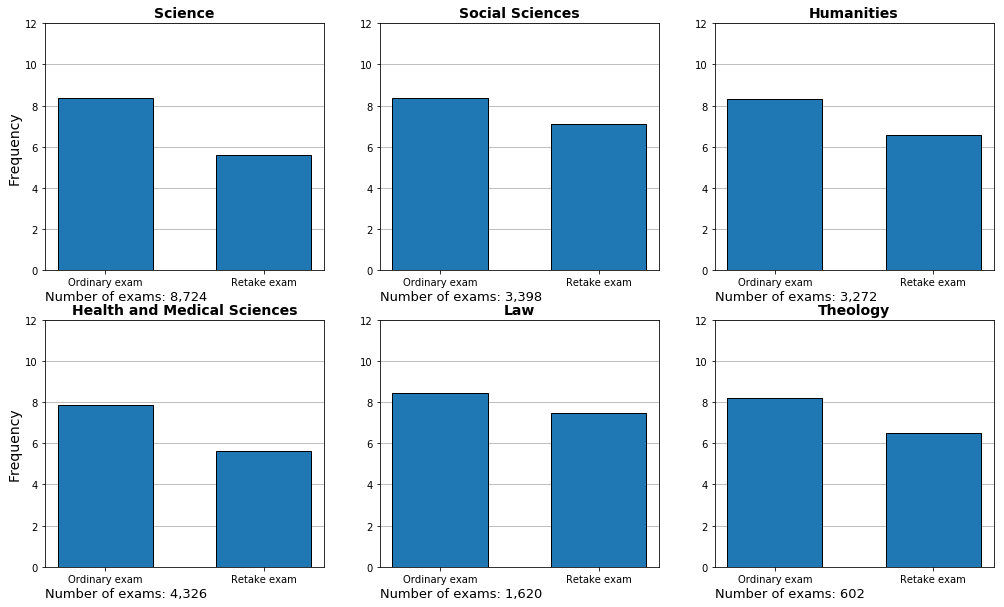

In [9]:
#Plot resulst
x = ["Ordinary exam", "Retake exam"]
y = ["Science", "Social Sciences","Humanities",\
     "Health and Medical Sciences","Law","Theology"]


f,ax = plt.subplots(figsize=(17,10))

plt.subplot(2,3,1)
plt.title(y[0], fontsize = 14, weight = 'bold')
plt.ylim([0,12])
plt.grid(axis ='y',zorder=0)
plt.ylabel('Frequency',fontsize=14)
plt.bar(x, faculties_results[0], width=0.6, edgecolor='black',zorder=3)
plt.annotate('Number of exams: '+ "8,724", (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')

plt.subplot(2,3,2)
plt.title(y[1], fontsize = 14, weight = 'bold')
plt.ylim([0,12])
plt.grid(axis ='y',zorder=0)
#plt.ylabel('Frequency',fontsize=14)
plt.bar(x, faculties_results[1], width=0.6, edgecolor='black',zorder=3)
plt.annotate('Number of exams: '+ "3,398", (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')

plt.subplot(2,3,3)
plt.title(y[2], fontsize = 14, weight = 'bold')
plt.ylim([0,12])
plt.grid(axis ='y',zorder=0)
#plt.ylabel('Frequency',fontsize=14)
plt.bar(x, faculties_results[2], width=0.6, edgecolor='black',zorder=3)
plt.annotate('Number of exams: '+ "3,272", (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')

plt.subplot(2,3,4)
plt.title(y[3], fontsize = 14, weight = 'bold')
plt.ylim([0,12])
plt.grid(axis ='y',zorder=0)
plt.ylabel('Frequency',fontsize=14)
plt.bar(x, faculties_results[3], width=0.6, edgecolor='black',zorder=3)
plt.annotate('Number of exams: '+ "4,326", (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')

plt.subplot(2,3,5)
plt.title(y[4], fontsize = 14, weight = 'bold')
plt.ylim([0,12])
plt.grid(axis ='y',zorder=0)
#plt.ylabel('Frequency',fontsize=14)
plt.bar(x, faculties_results[4], width=0.6, edgecolor='black',zorder=3)
plt.annotate('Number of exams: '+ "1,620", (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')

plt.subplot(2,3,6)
plt.title(y[5], fontsize = 14, weight = 'bold')
plt.ylim([0,12])
plt.grid(axis ='y',zorder=0)
#plt.ylabel('Frequency',fontsize=14)
plt.bar(x, faculties_results[5], width=0.6, edgecolor='black',zorder=3)
plt.annotate('Number of exams: '+ "602", (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')

plt.savefig('ordinary_vs_retake.png')

In [13]:
# This function computes the gpa of ordinary and retake exams for some fakulty.
# Output is a 2D vector where the first coordinate is the ordinary gpa and the
# second coordinate is the retake gpa.
def gpa_ordi_reta_faculty(df,string):
    ordi = []
    reta = []
    ordi_number = []
    reta_number = []
    
    for i in range(0,len(df)):
        if df["Fakultet"][i] == string:
            ects = int(df["Credit_edit"][i]*10)
            for j in range(0,ects):
                if df["Eksamenstype"][i] == "Ordinær eksamen":
                    ordi.append(df["Snit"][i])
                if df["Eksamenstype"][i] == "Reeksamen":
                    reta.append(df["Snit"][i])
            if df["Eksamenstype"][i] == "Ordinær eksamen":
                ordi_number.append(1)
            if df["Eksamenstype"][i] == "Reeksamen":
                reta_number.append(-1)
                
    ordi_number = [x for x in ordi_number if (math.isnan(x) == False)]
    reta_number = [x for x in reta_number if (math.isnan(x) == False)]
    
    ordi = [x for x in ordi if (math.isnan(x) == False)]
    ordi_old = ordi
    
    reta = [x for x in reta if (math.isnan(x) == False)]
    reta_old = reta
    
    
    ordi = sum(ordi)/len(ordi)
    reta = sum(reta)/len(reta)
    return ordi,reta#,ordi_number,reta_number#, ordi_old, reta_old

def gpa_ordi_reta_faculty_test(df,string):
    ordi = []
    reta = []
    for i in range(0,len(df)):
        if df["Fakultet"][i] == string:
            ects = int(df["Credit_edit"][i]*10)
            for j in range(0,ects):
                if df["Eksamenstype"][i] == "Ordinær eksamen":
                    ordi.append(df["Snit"][i])
                if df["Eksamenstype"][i] == "Reeksamen":
                    reta.append(df["Snit"][i])

    ordi = [x for x in ordi if (math.isnan(x) == False)]
    
    reta = [x for x in reta if (math.isnan(x) == False)]
    
    
    ordi_res = sum(ordi)/len(ordi)
    reta_res = sum(reta)/len(reta)
    return ordi_res,reta_res, ordi, reta

### Type of Assessment

In [1]:
#Import packages
import pickle
import pandas as pd
import numpy as np
import math
from math import isnan
import seaborn as sns
import statistics
from tqdm import tqdm_notebook
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

In [2]:
#Open dataframe saved from scraping process
with open('df_final.pkl', 'rb') as f:
    df = pickle.load(f)

In [159]:
#calculate fraction of the 3 important types of assessment
vigtige = 0
andre = 0
for i in range(0,len(df)):
    if df["Type of assessmet_edit"][i]=="Oral" or df["Type of assessmet_edit"][i]=="Written under invigilation" or df["Type of assessmet_edit"][i]=="Written not under invigilation":
        vigtige = vigtige +1
    if df["Type of assessmet_edit"][i]=="Continuous assessment not exam" or df["Type of assessmet_edit"][i]=="Portfolio" or df["Type of assessmet_edit"][i]=="Practical" or df["Type of assessmet_edit"][i]=="Course participation written" or df["Type of assessmet_edit"][i]=="Course participation not written" or df["Type of assessmet_edit"][i]=="Continuous assessment exam" or df["Type of assessmet_edit"][i]=="Other":
        andre = andre +1
print("De tre vigtige: ",vigtige)
print("De øvrige: ", andre)
print("Fraktion: ", 100*(vigtige/(andre+vigtige)))

De tre vigtige:  10691
De øvrige:  3293
Fraktion:  76.4516590389016


In [3]:
#Calculate gpa when only passed exams are counted
snit = []
for i in range(0,len(df)):
    x_02 = df[2][i]
    x_04 = df[4][i]
    x_07 = df[7][i]
    x_10 = df[10][i]
    x_12 = df[12][i]
    
    number = (x_12,x_10,x_07,x_04,x_02)
    grades = [12,10,7,4,2]
    mydick = dict(zip(grades,number))
    cleandick = {k: mydick[k] for k in mydick if not isnan(mydick[k])}
    
    num = sum([x * y for x,y in mydick.items()])
    den = sum(mydick.values())
    
    snit.append(num/den)
    
df["Snit"] = snit

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in long_scalars


In [7]:
#Calculates gpa's on type of assessment
cane = gpa(df,"Continuous assessment not exam")
oral = gpa(df,"Oral")
wnui = gpa(df,"Written not under invigilation")
wui = gpa(df,"Written under invigilation")
port = gpa(df,"Portfolio")
prac = gpa(df,"Practical")
cpw = gpa(df,"Course participation written")
cpnw = gpa(df,"Course participation not written")
cae = gpa(df,"Continuous assessment exam")
other = gpa(df,"Other")

In [8]:
#Self-explaining
print("Written not under invigilation ",wnui)
print("Written under invigilation: ",wui)
print("Oral: ",oral)

print("Continuous assessment exam: ",cae)
print("Course participation written: ",cpw)
print("Course participation not written: ",cpnw)

print("Portfolio: ",port)
print("Practical: ",prac)
print("Other: ",other)

print("Continuous assessment no exam: ",cane)

Written not under invigilation  7.970297719470407
Written under invigilation:  6.591285108980847
Oral:  8.727513470023109
Continuous assessment exam:  7.848840234005831
Course participation written:  7.788071597048979
Course participation not written:  8.53326916303788
Portfolio:  8.350214896224989
Practical:  7.430678518734344
Other:  8.058445698720027
Continuous assessment no exam:  8.09986587529809


In [164]:
#Calculate frequencies of the three types.
a = gpa_frequencies(df,"Written not under invigilation")
b = gpa_frequencies(df,"Written under invigilation")
c = gpa_frequencies(df,"Oral")

print((a[0]+b[0]+c[0])/3)

0.12719618445774633


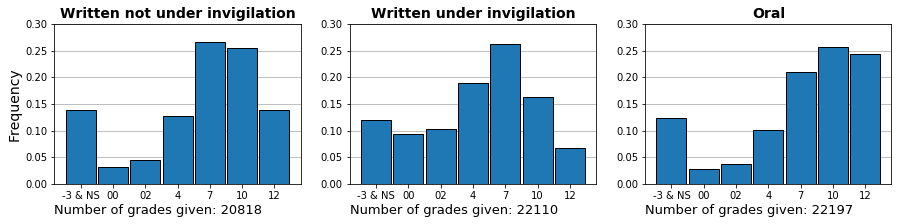

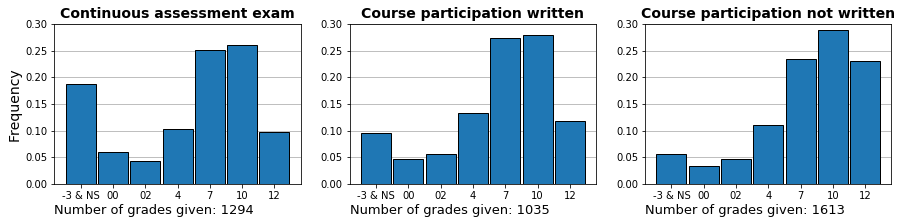

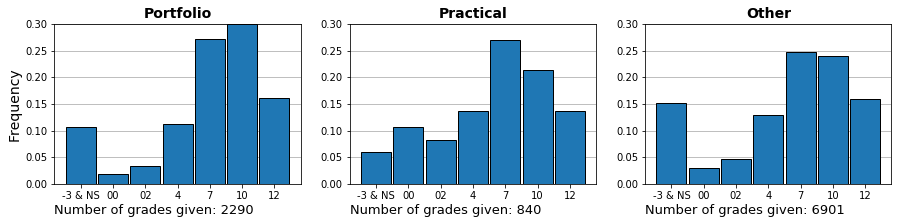

In [6]:
#Calculate plots
x = ["-3 & NS","00","02","4","7","10","12"]
Titles = ["Continuous assessment exam","Written not under invigilation",\
          "Written under invigilation","Course participation written","Course participation not written",\
          "Oral","Other","Portfolio","Practical"]
y = [gpa_frequencies(df,Titles[0]),gpa_frequencies(df,Titles[1]),gpa_frequencies(df,Titles[2]),\
    gpa_frequencies(df,Titles[3]),gpa_frequencies(df,Titles[4]),gpa_frequencies(df,Titles[5]),\
    gpa_frequencies(df,Titles[6]),gpa_frequencies(df,Titles[7]),gpa_frequencies(df,Titles[8])]


f,ax = plt.subplots(figsize=(15,10))

#Written not under invigilation
plt.subplot(3,3,1)
plt.title(Titles[1], fontsize = 14, weight = 'bold')
plt.ylim([0,0.30])
plt.grid(axis ='y',zorder=0)
plt.ylabel('Frequency',fontsize=14)
plt.bar(x, y[1], width=0.93, edgecolor='black',zorder=3)
plt.annotate('Number of grades given: '+ "20818", (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')



#Written under invigilation
plt.subplot(3,3,2)
plt.title(Titles[2], fontsize = 14, weight = 'bold')
plt.ylim([0,0.30])
plt.grid(axis ='y',zorder=0)
#plt.ylabel('Frequency',fontsize=14)
plt.bar(x, y[2], width=0.93, edgecolor='black',zorder=3)
plt.annotate('Number of grades given: '+ "22110", (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')



#Oral
plt.subplot(3,3,3)
plt.title(Titles[5], fontsize = 14, weight = 'bold')
plt.ylim([0,0.30])
plt.grid(axis ='y',zorder=0)
#plt.ylabel('Frequency',fontsize=14)
plt.bar(x, y[5], width=0.93, edgecolor='black',zorder=3)
plt.annotate('Number of grades given: '+ "22197", (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig('type_of_assessment1.png')

f,ax = plt.subplots(figsize=(15,10))

#Continuous assessment exam
plt.subplot(3,3,1)
plt.title(Titles[0], fontsize = 14, weight = 'bold')
plt.ylim([0,0.30])
plt.grid(axis ='y',zorder=0)
plt.ylabel('Frequency',fontsize=14)
plt.bar(x, y[0], width=0.93, edgecolor='black',zorder=3)
plt.annotate('Number of grades given: '+ "1294", (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')



#Course participation written
plt.subplot(3,3,2)
plt.title(Titles[3], fontsize = 14, weight = 'bold')
plt.ylim([0,0.30])
plt.grid(axis ='y',zorder=0)
#plt.ylabel('Frequency',fontsize=14)
plt.bar(x, y[3], width=0.93, edgecolor='black',zorder=3)
plt.annotate('Number of grades given: '+ "1035", (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')



#Course participation not written
plt.subplot(3,3,3)
plt.title(Titles[4], fontsize = 14, weight = 'bold')
plt.ylim([0,0.30])
plt.grid(axis ='y',zorder=0)
#plt.ylabel('Frequency',fontsize=14)
plt.bar(x, y[4], width=0.93, edgecolor='black',zorder=3)
plt.annotate('Number of grades given: '+ "1613", (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')
#plt.savefig('type_of_assessment2.png')

f,ax = plt.subplots(figsize=(15,10))
#Portfolio
plt.subplot(3,3,1)
plt.title(Titles[7], fontsize = 14, weight = 'bold')
plt.ylim([0,0.30])
plt.grid(axis ='y',zorder=0)
plt.ylabel('Frequency',fontsize=14)
plt.bar(x, y[7], width=0.93, edgecolor='black',zorder=3)
plt.annotate('Number of grades given: '+ "2290", (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')



#Portfolio
plt.subplot(3,3,2)
plt.title(Titles[8], fontsize = 14, weight = 'bold')
plt.ylim([0,0.30])
plt.grid(axis ='y',zorder=0)
#plt.ylabel('Frequency',fontsize=14)
plt.bar(x, y[8], width=0.93, edgecolor='black',zorder=3)
plt.annotate('Number of grades given: '+ "840", (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')



#Other
plt.subplot(3,3,3)
plt.title(Titles[6], fontsize = 14, weight = 'bold')
plt.ylim([0,0.30])
plt.grid(axis ='y',zorder=0)
#plt.ylabel('Frequency',fontsize=14)
plt.bar(x, y[6], width=0.93, edgecolor='black',zorder=3)
plt.annotate('Number of grades given: '+ "6901", (0,0), (0, -20),fontsize= 13, xycoords='axes fraction', textcoords='offset points', va='top')

plt.savefig('type_of_assessment3.png')

In [21]:
#Selfexplaining
print("Written not under invigilation: ",len(gpa_frequencies(df,"Written not under invigilation")[7]))
print("Written under invigilation: ",len(gpa_frequencies(df,"Written under invigilation")[7]))
print("Oral: ",len(gpa_frequencies(df,"Oral")[7]))

print("Continuous assessment exam: ",len(gpa_frequencies(df,"Continuous assessment exam")[7]))
print("Course participation written: ",len(gpa_frequencies(df,"Course participation written")[7]))
print("Course participation not written: ",len(gpa_frequencies(df,"Course participation not written")[7]))

print("Portfolio: ",len(gpa_frequencies(df,"Portfolio")[7]))
print("Practical: ",len(gpa_frequencies(df,"Practical")[7]))
print("Other: ",len(gpa_frequencies(df,"Other")[7]))



Written not under invigilation:  20818
Written under invigilation:  22110
Oral:  22197
Continuous assessment exam:  1294
Course participation written:  1035
Course participation not written:  1613
Portfolio:  2290
Practical:  840
Other:  6901


In [4]:
# Here I calculate the GPA of some form of assessment
def gpa(df,string):
    
    x_gpa = []
    x_sho = []
    x_ect = []

    for i in range(0,len(df)):
        if df["Type of assessmet_edit"][i] == string:
            if math.isnan(df["Snit"][i]) == False:
                x_gpa.append(float(df["Snit"][i]))
                x_sho.append(float(df["Fremmødte"][i]))
                x_ect.append(float(df["Credit_edit"][i]))

    den = 0
    num = 0
    for i in range(0,len(x_gpa)):
        den = x_sho[i]*x_ect[i] + den
        num = x_gpa[i]*x_sho[i]*x_ect[i] + num
    out = num/den
    return out
#Here I return another variable because I tried to perform statistical tests
#This code was not used
def gpa_test(df,string):
    
    x_gpa = []
    x_sho = []
    x_ect = []

    for i in range(0,len(df)):
        if df["Type of assessmet_edit"][i] == string:
            if math.isnan(df["Snit"][i]) == False:
                x_gpa.append(float(df["Snit"][i]))
                x_sho.append(float(df["Fremmødte"][i]))
                x_ect.append(float(df["Credit_edit"][i]))

    den = 0
    num = 0
    for i in range(0,len(x_gpa)):
        den = x_sho[i]*x_ect[i] + den
        num = x_gpa[i]*x_sho[i]*x_ect[i] + num
    out = num/den
    return out,x_gpa

In [5]:
# Here I calculate the GPA of some form of assessment

def gpa_frequencies(df,string):
   
    #Returns a frequencies list in the order (#12,#10,#7,#4,#02,#00,#-3)
    x_12 = []
    x_10 = []
    x_07 = []
    x_04 = []
    x_02 = []
    x_00 = []
    x_m3ef = []
    #x_total = []

    for i in range(0,len(df)):
        if df["Type of assessmet_edit"][i] == string:
            ects = df["Credit_edit"][i]
            x_12.append(df[12][i]*ects)
            x_10.append(df[10][i]*ects)
            x_07.append(df[7][i]*ects)
            x_04.append(df[4][i]*ects)
            x_02.append(df[2][i]*ects)
            x_00.append(df[0][i]*ects)
            x_m3ef.append(df[-3][i]*ects)
            x_m3ef.append(df["Ej mødt"][i]*ects)
            
            #x_total.append(df[12][i])
            #x_total.append(df[10][i])
            #x_total.append(df[7][i])
            #x_total.append(df[4][i])
            #x_total.append(df[2][i])
            #x_total.append(df[-3][i])
            #x_total.append(df["Ej mødt"][i])

    x_12 = [x for x in x_12 if (math.isnan(x) == False)]
    x_10 = [x for x in x_10 if (math.isnan(x) == False)]
    x_07 = [x for x in x_07 if (math.isnan(x) == False)]
    x_04 = [x for x in x_04 if (math.isnan(x) == False)]
    x_02 = [x for x in x_02 if (math.isnan(x) == False)]
    x_00 = [x for x in x_00 if (math.isnan(x) == False)]
    x_m3ef = [x for x in x_m3ef if (math.isnan(x) == False)]
    #x_total = [x for x in x_total if (math.isnan(x) == False)]

    total = sum(x_12)+sum(x_10)+sum(x_07)+sum(x_04)+sum(x_02)+sum(x_00)+sum(x_m3ef)
    fre_12 = sum(x_12)/total
    fre_10 = sum(x_10)/total
    fre_07 = sum(x_07)/total
    fre_04 = sum(x_04)/total
    fre_02 = sum(x_02)/total
    fre_00 = sum(x_00)/total
    fre_m3ef = sum(x_m3ef)/total
    
    return fre_m3ef,fre_00,fre_02,fre_04,fre_07,fre_10,fre_12#,x_total

